데이터 : 2021.4 wish.com 검색어 별 상품 정보 (상품명, 판매량, 평점, 판매자, 판매자 평점 등)

분석 : 판매량 예측


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# 패션 관련 검색어 데이터

url1 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//bodysuit.csv'
url2 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//dress.csv'
url3 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//fashion.csv'
url4 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//girl.csv'
url5 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//pullover.csv'
url6 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//top.csv'
url7 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//tops.csv'
url8 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//woman.csv'
url9 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//women.csv'
url10 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//womens.csv'

data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)
data3 = pd.read_csv(url3)
data4 = pd.read_csv(url4)
data5 = pd.read_csv(url5)
data6 = pd.read_csv(url6)
data7 = pd.read_csv(url7)
data8 = pd.read_csv(url8)
data9 = pd.read_csv(url9)
data10 = pd.read_csv(url10)

# 데이터 합치기
full_data1 = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])
full_data1.reset_index(inplace = True, drop = True)
len(full_data1)

9254

In [3]:
# 카테고리 특성 생성 (검색어 별로)

data1['category'] = 'bodysuit'
data2['category'] = 'dress'
data3['category'] = 'fashion'
data4['category'] = 'girl'
data5['category'] = 'pullover'
data6['category'] = 'top'
data7['category'] = 'tops'
data8['category'] = 'womens'
data9['category'] = 'womens'
data10['category'] = 'womens'

In [4]:
# 카테고리 생성한 데이터 합치기
# 중복값 제거를 위해 따로 생성 (카테고리 값이 다르므로 중복값을 제대로 못 잡아낼 수 있음)

full_data2 = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])
full_data2.reset_index(inplace = True, drop = True)
full_data2.index

RangeIndex(start=0, stop=9254, step=1)

In [5]:
# 중복값 확인 (data1)
full_data1.duplicated().sum()

825

In [6]:
# 첫번째 데이터셋에서 중복값 뽑기
duplicated_df = full_data1[full_data1.duplicated()]
duplicated_df

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id
931,RIDERACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5f2a918f90b8a6806b950572,NaN,5f2a918f90b8a6806b950572
932,Pink Floyd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5e8d2fce9719ed6404967680,NaN,5e8d2fce9719ed6404967680
945,Jack Daniel's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5e8d30069719ed64049677e3,NaN,5e8d30069719ed64049677e3
946,Adidas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5e542cf79719ed19e8484831,NaN,5e542cf79719ed19e8484831
954,BALEAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5f181ca7eb31f9ef295d51dc,NaN,5f181ca7eb31f9ef295d51dc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,berikbrand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5f327a9190b8a62e154b84c3,NaN,5f327a9190b8a62e154b84c3
9227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/60846dd13ffc4e0010bcc0db,NaN,60846dd13ffc4e0010bcc0db
9230,Damenmode Daisy Print Shirt Lässig Kurzarm O-A...,Women's Fashion Daisy Print Shirt Casual Short...,10.0,CHF,10.0,CHF,11.0,1000.0,NaN,NaN,...,pwiuxuus,"87% Positives Feedback (6,978 Bewertungen)",6978.0,4.114359,5ae3d438c1d5187ae0dcea90,NaN,NaN,https://www.wish.com/c/5ea689f78f9f700229cccef9,https://canary.contestimg.wish.com/api/webimag...,5ea689f78f9f700229cccef9
9234,Captain America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5ed7832f90b8a6318c2d7385,NaN,5ed7832f90b8a6318c2d7385


In [7]:
# 2번째 데이터셋에서 중복값의 인덱스를 드랍

full_data_drop = full_data2.drop(duplicated_df.index, axis = 0)
len(full_data_drop)

8429

In [8]:
# 타겟값이 결측인 데이터 드랍. (주로 다른 데이터도 결측인 듯)
drop_na = full_data_drop[full_data_drop['nb_cart_orders_approx'].isnull()]

full_data_drop.drop(drop_na.index, axis = 0, inplace = True)

In [9]:
len(full_data_drop)

8240

In [10]:
# 결측치 확인
full_data_drop.isnull().sum()

title                                     0
title_orig                                0
discount_price                            0
discount_price_currency                   0
retail_price                              0
retail_price_currency                     0
discount_price_in_original_currency       0
nb_cart_orders_approx                     0
nb_units_purchased_approx              8240
uses_ad_boosts                         8240
rating                                    0
rating_count                              0
rating_five_count                      1122
rating_four_count                      1122
rating_three_count                     1122
rating_two_count                       1122
rating_one_count                       1122
badges_count                           8240
badge_local_product                    8240
badge_product_quality                  8240
badge_fast_shipping                    8240
tags                                   8240
product_color                   

# EDA & Feature Engineer

In [11]:
# 변수명 단순화
fdr = full_data_drop.copy()

## Currency(통화) 관련 항목
- 통화의 종류 확인
- retail과 discount price의 통화는 같다. (중복 칼럼)
- 가격정보가 없는 상품 9개, retail / discount price 모두 없음
<br/>
<br/>

**Engineering**
- 통화의 종류 자체는 영향을 줄 수 있으니, 그대로 두고 가격만 유로로 통일시켜보자
- CHF : EUR = 1 : 0.91
- USD : EUR = 1 : 0.84
- retail currency와 discount currency가 같으므로, 하나를 드랍, 'currency'로 이름 변경
- 가격정보가 없는 상품은 드랍. (페이지도 삭제되어 정보를 구할 수 없음, 카테고리 구분이 제대로 되어 있지 않아서 다른 값으로 결측치를 넣기도 힘듦)

In [12]:
fdr['retail_price_currency'].value_counts()

EUR    5692
CHF    2460
USD      88
Name: retail_price_currency, dtype: int64

In [13]:
fdr['discount_price_currency'].value_counts()

EUR    5692
CHF    2460
USD      88
Name: discount_price_currency, dtype: int64

<AxesSubplot:xlabel='discount_price_currency', ylabel='count'>

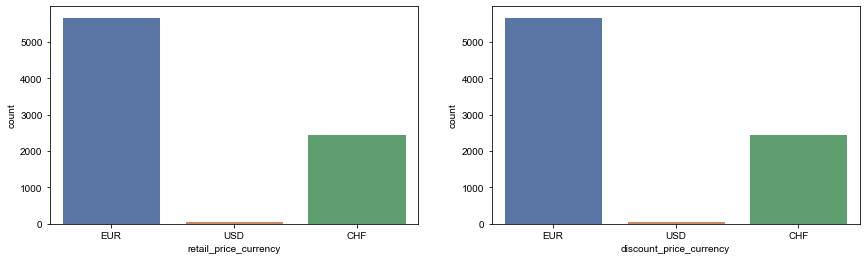

In [14]:
# 시각화 비교


fig, ax = plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)

sns.set_theme(style='darkgrid')
sns.countplot(ax = ax[0], data = fdr, x='retail_price_currency')
sns.countplot(ax = ax[1], data = fdr, x='discount_price_currency')


In [15]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
#     # currency 관련 
#     CHF_index = fdr[fdr['retail_price_currency'] == 'CHF'].index
#     df.loc[CHF_index, 'retail_price'] = df.loc[CHF_index, 'retail_price'] * 0.91
#     df.loc[CHF_index, 'discount_price'] = df.loc[CHF_index, 'discount_price'] * 0.91
#     full_data_drop.loc[CHF_index, 'shipping_option_price'] = full_data_drop.loc[CHF_index, 'shipping_option_price'] * 0.91
    
#     USD_index = df[df['retail_price_currency'] == 'USD'].index
#     df.loc[USD_index, 'retail_price'] = df.loc[USD_index, 'retail_price'] * 0.84
#     df.loc[USD_index, 'discount_price'] = df.loc[USD_index, 'discount_price'] * 0.84
#     full_data_drop.loc[USD_index, 'shipping_option_price'] = full_data_drop.loc[USD_index, 'shipping_option_price'] * 0.84
    
#     df.rename(columns={"retail_price_currency": "currency"})
    
#     # price 관련
#     no_price_info = df[df['discount_price'] == 0]
#     df.drop(no_price_info.index, axis = 0, inplace = True)

In [16]:
fdr[fdr['discount_price'] == 0]

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,category
2805,150 pièces jetable Màsk Childen bouclier facia...,150pcs Disposable Màsk Childen Face Shield Bre...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,"92 % avis positifs (16,758 notes)",16758.0,4.345268,57b595a5a284ca067f319edb,NaN,NaN,https://www.wish.com/c/5f98dac706f4aa084221ba17,https://canary.contestimg.wish.com/api/webimag...,5f98dac706f4aa084221ba17,girl
2905,2021 nouveau respirateur Cubrebocas masque chi...,2021 New Respirator Cubrebocas Disposable Surg...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,83 % avis positifs (29 notes),29.0,4.000000,5eb3cc0d06eb8d004bdde334,NaN,NaN,https://www.wish.com/c/602b79b56d16700054921a35,https://canary.contestimg.wish.com/api/webimag...,602b79b56d16700054921a35,girl
3305,FFP2 Mascarillas KN95 masque enfants 5 couches...,FFP2 Mascarillas KN95 Kids Mask 5 Layers Face ...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,92 % avis positifs (444 notes),444.0,4.373874,58298f440299bc1b499293d3,NaN,NaN,https://www.wish.com/c/5ff2d52c83e2b958121b6c33,https://canary.contestimg.wish.com/api/webimag...,5ff2d52c83e2b958121b6c33,girl
6611,2 pièces / ensemble élégante femme noble bijou...,2 Pieces / Set Elegant Noble Woman Fashion Jew...,0.0,EUR,0.0,EUR,0.0,5000.0,NaN,NaN,...,"90 % avis positifs (30,732 notes)",30732.0,4.280815,5aa7861eb722cf6a46c63a32,NaN,NaN,https://www.wish.com/c/5ec002c3e5bfb172760eba7c,https://canary.contestimg.wish.com/api/webimag...,5ec002c3e5bfb172760eba7c,womens
6717,2Pcs / Ensemble De Luxe Noble et Élégant Belle...,2Pcs/Set Luxury Noble and Elegant Beautiful Wo...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,"87 % avis positifs (2,969 notes)",2969.0,4.161334,5d53a3c33db43e5101f40182,NaN,NaN,https://www.wish.com/c/5fbbd41fe46d1d9d7f534beb,https://canary.contestimg.wish.com/api/webimag...,5fbbd41fe46d1d9d7f534beb,womens
6977,Mode luxe diamant noir Couple bague diamant fi...,Fashion Luxury Black Diamond Couple Ring Diamo...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,"92 % avis positifs (1,152 notes)",1152.0,4.341146,5f3c8516e09a35da28906a4f,NaN,NaN,https://www.wish.com/c/5f49f80fc1ddf3029b76b410,https://canary.contestimg.wish.com/api/webimag...,5f49f80fc1ddf3029b76b410,womens
7024,Élégante Noble Femme Mode Coeur Bague Superbe ...,Elegant Noble Woman Fashion Heart Ring Superb ...,0.0,EUR,0.0,EUR,0.0,5000.0,NaN,NaN,...,"90 % avis positifs (30,732 notes)",30732.0,4.280815,5aa7861eb722cf6a46c63a32,NaN,NaN,https://www.wish.com/c/5edbadd6ab01de438901a75a,https://canary.contestimg.wish.com/api/webimag...,5edbadd6ab01de438901a75a,womens
7260,Élégante belle femme mode luxe 18 carats bijou...,Elegant Beautiful Woman Fashion Luxury 18K Gol...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,"89 % avis positifs (23,905 notes)",23905.0,4.243338,5a96a99708a2241d6b6e04f0,NaN,NaN,https://www.wish.com/c/5f68e2505167ffd45ab53182,https://canary.contestimg.wish.com/api/webimag...,5f68e2505167ffd45ab53182,womens
7380,14k or gravé à la main vague bord anneau hawaï...,14k Gold Hand Engraved Wave Edge Ring Hawaiian...,0.0,EUR,0.0,EUR,0.0,20000.0,NaN,NaN,...,87 % avis positifs (135 notes),135.0,4.059259,5fe5a4086a1cf8bc93ccfd28,NaN,NaN,https://www.wish.com/c/6017b642c1e48528f7d75020,https://canary.contestimg.wish.com/api/webimag...,6017b642c1e48528f7d75020,womens


In [17]:
fdr[fdr['retail_price'] == 0]

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,category
2805,150 pièces jetable Màsk Childen bouclier facia...,150pcs Disposable Màsk Childen Face Shield Bre...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,"92 % avis positifs (16,758 notes)",16758.0,4.345268,57b595a5a284ca067f319edb,NaN,NaN,https://www.wish.com/c/5f98dac706f4aa084221ba17,https://canary.contestimg.wish.com/api/webimag...,5f98dac706f4aa084221ba17,girl
2905,2021 nouveau respirateur Cubrebocas masque chi...,2021 New Respirator Cubrebocas Disposable Surg...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,83 % avis positifs (29 notes),29.0,4.000000,5eb3cc0d06eb8d004bdde334,NaN,NaN,https://www.wish.com/c/602b79b56d16700054921a35,https://canary.contestimg.wish.com/api/webimag...,602b79b56d16700054921a35,girl
3305,FFP2 Mascarillas KN95 masque enfants 5 couches...,FFP2 Mascarillas KN95 Kids Mask 5 Layers Face ...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,92 % avis positifs (444 notes),444.0,4.373874,58298f440299bc1b499293d3,NaN,NaN,https://www.wish.com/c/5ff2d52c83e2b958121b6c33,https://canary.contestimg.wish.com/api/webimag...,5ff2d52c83e2b958121b6c33,girl
6611,2 pièces / ensemble élégante femme noble bijou...,2 Pieces / Set Elegant Noble Woman Fashion Jew...,0.0,EUR,0.0,EUR,0.0,5000.0,NaN,NaN,...,"90 % avis positifs (30,732 notes)",30732.0,4.280815,5aa7861eb722cf6a46c63a32,NaN,NaN,https://www.wish.com/c/5ec002c3e5bfb172760eba7c,https://canary.contestimg.wish.com/api/webimag...,5ec002c3e5bfb172760eba7c,womens
6717,2Pcs / Ensemble De Luxe Noble et Élégant Belle...,2Pcs/Set Luxury Noble and Elegant Beautiful Wo...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,"87 % avis positifs (2,969 notes)",2969.0,4.161334,5d53a3c33db43e5101f40182,NaN,NaN,https://www.wish.com/c/5fbbd41fe46d1d9d7f534beb,https://canary.contestimg.wish.com/api/webimag...,5fbbd41fe46d1d9d7f534beb,womens
6977,Mode luxe diamant noir Couple bague diamant fi...,Fashion Luxury Black Diamond Couple Ring Diamo...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,"92 % avis positifs (1,152 notes)",1152.0,4.341146,5f3c8516e09a35da28906a4f,NaN,NaN,https://www.wish.com/c/5f49f80fc1ddf3029b76b410,https://canary.contestimg.wish.com/api/webimag...,5f49f80fc1ddf3029b76b410,womens
7024,Élégante Noble Femme Mode Coeur Bague Superbe ...,Elegant Noble Woman Fashion Heart Ring Superb ...,0.0,EUR,0.0,EUR,0.0,5000.0,NaN,NaN,...,"90 % avis positifs (30,732 notes)",30732.0,4.280815,5aa7861eb722cf6a46c63a32,NaN,NaN,https://www.wish.com/c/5edbadd6ab01de438901a75a,https://canary.contestimg.wish.com/api/webimag...,5edbadd6ab01de438901a75a,womens
7260,Élégante belle femme mode luxe 18 carats bijou...,Elegant Beautiful Woman Fashion Luxury 18K Gol...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,"89 % avis positifs (23,905 notes)",23905.0,4.243338,5a96a99708a2241d6b6e04f0,NaN,NaN,https://www.wish.com/c/5f68e2505167ffd45ab53182,https://canary.contestimg.wish.com/api/webimag...,5f68e2505167ffd45ab53182,womens
7380,14k or gravé à la main vague bord anneau hawaï...,14k Gold Hand Engraved Wave Edge Ring Hawaiian...,0.0,EUR,0.0,EUR,0.0,20000.0,NaN,NaN,...,87 % avis positifs (135 notes),135.0,4.059259,5fe5a4086a1cf8bc93ccfd28,NaN,NaN,https://www.wish.com/c/6017b642c1e48528f7d75020,https://canary.contestimg.wish.com/api/webimag...,6017b642c1e48528f7d75020,womens


## 판매량 (Target 항목)
 - "nb_cart_orders_approx"은 장바구니에 담긴 횟수를 뜻하는 것 같지만, "units_purchased" 항목이 전부 결측이므로, 이 항목을 타겟으로 설정
<br/>   
<br/>  

**Engineering**
 - 값들이 범주로 나눠져 있는 것을 알 수 있음
 - 1단위 숫자들만 이상치로 여겨짐
 - 해당 숫자를 10으로 통일

In [18]:
fdr['nb_cart_orders_approx'].value_counts()

10.0        3452
1000.0      2167
5000.0       718
0.0          573
10000.0      511
20000.0      346
1.0          149
50000.0       62
2.0           48
4.0           45
3.0           42
5.0           36
9.0           21
6.0           21
8.0           19
7.0           17
100000.0      13
Name: nb_cart_orders_approx, dtype: int64

<AxesSubplot:xlabel='nb_cart_orders_approx', ylabel='count'>

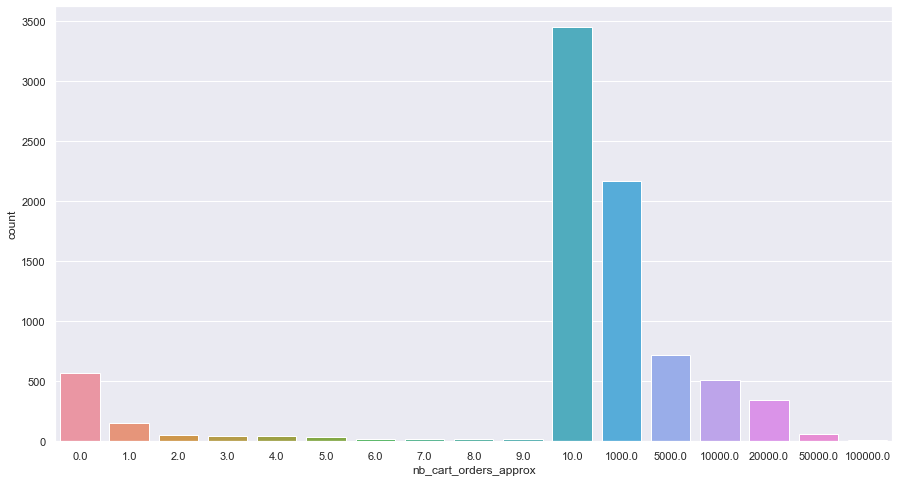

In [19]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(ax = ax, data = fdr, x='nb_cart_orders_approx')

In [20]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
    
#     # Target (판매량) 관련
#     order_under_10 = df[df['nb_cart_orders_approx'] <= 10 ]
#     df.loc[order_under_10.index, 'nb_cart_orders_approx'] = 10

## Shipping option 관련 항목
- shipping options은 standard & express 두 가지 밖에 없다.
- shipping option name과 express 배송 가능 여부 항목 2가지가 있다.  
<br/>
<br/>

**Engineering**
- express 배송을 지원하느냐는 항목이 또 있으므로, option name 항목은 쓰지 않기로 한다. 
- express 지원 여부 항목은 0, 1로 바꾼다.

In [21]:
fdr['shipping_option_name'].value_counts()

Livraison standard    7585
Livraison Express      655
Name: shipping_option_name, dtype: int64

In [22]:
full_data_drop['shipping_is_express'].value_counts()

False    7585
True      655
Name: shipping_is_express, dtype: int64

<AxesSubplot:xlabel='shipping_is_express', ylabel='count'>

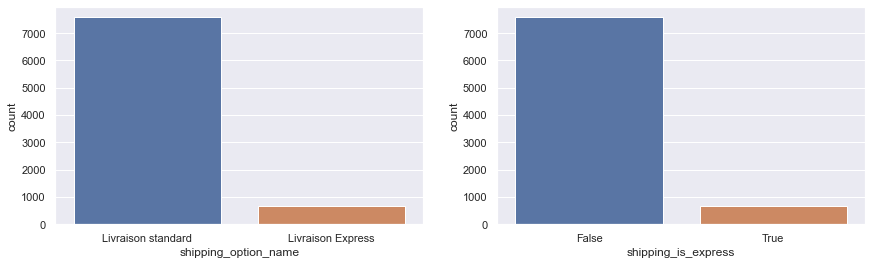

In [23]:
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)

sns.set_theme(style='darkgrid')
sns.countplot(ax = ax[0], data = fdr, x='shipping_option_name')
sns.countplot(ax = ax[1], data = fdr, x='shipping_is_express')

In [24]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
    
#     # shipping option 관련
#     express_false = df[df['shipping_is_express'] == False]
#     express_true = df[df['shipping_is_express'] == True]

#     df.loc[express_false.index, 'shipping_is_express'] = 0
#     df.loc[express_true.index, 'shipping_is_express'] = 1
    
#     df.drop('shipping_option_name', axis = 1, inplace = True)

## Urgency banner 관련
- 일종의 광고 (마감임박 등) 존재 여부, 있으면 True, 없으면 결측  
<br/>
<br/>

**Engineering**
- 0,1로 대체한다.
- Ture => 1
- 결측치는 0으로 fill
- urgency banner text 항목은 드랍. (광고를 사용하느냐 안하느냐 여부만 있으면 된다고 판단됨)

In [25]:
fdr['has_urgency_banner'].value_counts()

True    2129
Name: has_urgency_banner, dtype: int64

In [26]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
    
#     # urgency_banner 관련
#     urgency_banner_true = df[df['has_urgency_banner'] == True]
#     df.loc[urgency_banner_true.index, 'has_urgency_banner'] = 1
#     df['has_urgency_banner'].fillna(0, inplace=True)
#     df.drop('urgency_text', axis = 1, inplace = True)
    

## Origin Country 
 - 원산지 정보.
 - 카디널리티가 높다.

**Engineering**
 - 개별 항목이 차지하는 비율이 5%가 넘지 않는 것들은 others로 묶는다.

In [27]:
fdr['origin_country'].value_counts()

CN    6679
US     551
CA     452
GB     128
PL      67
FR      51
KR      31
DE      25
ES      24
VN      23
SG      22
VE      21
TR      19
NL      11
RS       7
AU       7
IT       5
PK       5
TH       4
GR       3
RU       3
IN       3
PE       2
CR       2
MD       1
PA       1
BE       1
CH       1
CO       1
JP       1
PH       1
HR       1
Name: origin_country, dtype: int64

<AxesSubplot:xlabel='origin_country', ylabel='count'>

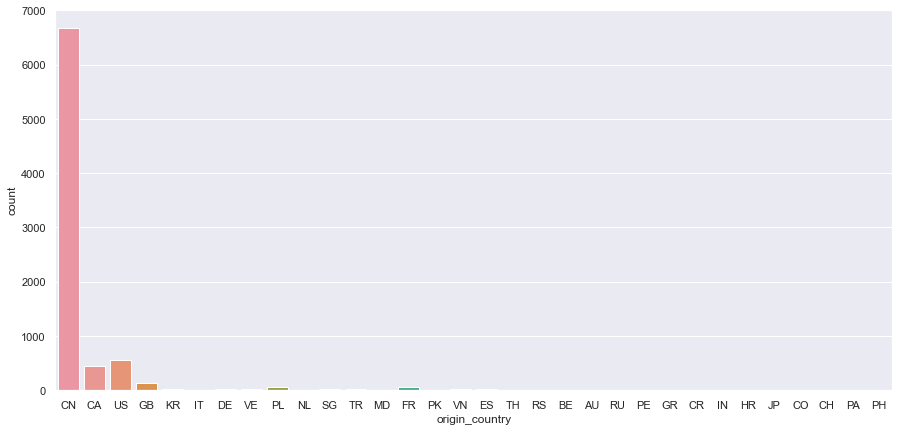

In [28]:
plt.figure(figsize = (15, 7))
sns.countplot(data = fdr, x = 'origin_country')

In [29]:
# 3등 CA 원산지의 비율 = 5%
print(452 / 8240)

# 4등 GB 원산지의 비율 = 1.5%
# GB부터 아래로는 others로
print(128 / 8240)

0.054854368932038836
0.015533980582524271


In [30]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
    
#     # origin_country 관련
#     origin_list = df['origin_country'].unique()
#     origin_remain = ['CN', 'US', 'CA']
#     origin_list_other = origin_list.tolist()

#     for i in origin_remain :
#         origin_list_other.remove(i)

#     origin_other = df[df['origin_country'].isin(origin_list_other)]
#     df.loc[origin_other.index, 'origin_country'] = 'other'
    

## Rating
- rating_count가 0인데 rating이 0이 아닌 항목들이 있다.

**Engineering**
- rating_count가 0인 항목들은 rating도 0으로 바꿔준다.

<AxesSubplot:xlabel='rating', ylabel='rating_count'>

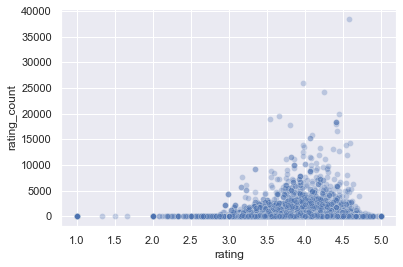

In [31]:
sns.scatterplot(data = fdr, x = 'rating', y = 'rating_count', alpha = 0.3)

In [32]:
# rating_count가 0인데 rating이 0이 아닌 항목들이 있다.

ratingcount_0 = fdr[fdr['rating_count'] == 0]
fdr.loc[ratingcount_0.index, 'rating'].value_counts()

5.0    1122
Name: rating, dtype: int64

In [33]:
def rating_engineer(df):
    
    #rating_count, rating 관련
    rating_count_0 = df[df['rating_count'] ==0]
    df.loc[rating_count_0.index, 'rating'] = 0
    
    return df
    


In [34]:
fdr_sample1 = fdr.copy()
rating_engineer(fdr_sample1)

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,category
0,Femmes adulte bébé manches longues appuyez sur...,Women Adult Baby Long Sleeves Press Button Sof...,13.00,EUR,75.0,EUR,15.00,10.0,NaN,NaN,...,"94 % avis positifs (5,008 notes)",5008.0,4.442891,59561a5f4b913a121390185e,NaN,NaN,https://www.wish.com/c/5c330888e6a1c67869f93ac2,https://canary.contestimg.wish.com/api/webimag...,5c330888e6a1c67869f93ac2,bodysuit
1,Femmes Taille Shaper Hip Shaper Taille Formate...,Women Waist Shaper Hip Shaper Waist Trainer Hi...,4.74,EUR,100.0,EUR,5.75,10.0,NaN,NaN,...,100 % avis positifs (8 notes),8.0,4.750000,5fd311b12d396510174befa5,NaN,NaN,https://www.wish.com/c/5fd8863f7cd35f4e675a3bb7,https://canary.contestimg.wish.com/api/webimag...,5fd8863f7cd35f4e675a3bb7,bodysuit
2,Mode féminine Body en dentelle Sous-vêtements ...,Women’s Fashion Lace Bodysuit Backless Underwe...,4.00,EUR,4.0,EUR,4.00,10000.0,NaN,NaN,...,"(36,935 notes)",36935.0,4.103506,5abb2cf26be8733b5bf6844f,NaN,NaN,https://www.wish.com/c/5dc116e394f9720a5b40870f,https://canary.contestimg.wish.com/api/webimag...,5dc116e394f9720a5b40870f,bodysuit
3,Body de mode femme à manches longues en V prof...,Femme Fashion Bodysuit Long Sleeve Deep V Soli...,8.00,EUR,8.0,EUR,9.00,3.0,NaN,NaN,...,"87 % avis positifs (22,384 notes)",22384.0,4.076305,58fdedf645f9b210f58c00cc,NaN,NaN,https://www.wish.com/c/600faeee00d584f29f59f6c5,https://canary.contestimg.wish.com/api/webimag...,600faeee00d584f29f59f6c5,bodysuit
5,Combinaison Slinky à jambe fendue et volante à...,Women Fashion Layered Ruffle Split Leg Slinky ...,14.00,EUR,83.0,EUR,16.00,10.0,NaN,NaN,...,"87 % avis positifs (23,754 notes)",23754.0,4.103562,53a7f2d838d3043ba1ef5e3e,NaN,NaN,https://www.wish.com/c/5b18e655614a7115fd7f7042,https://canary.contestimg.wish.com/api/webimag...,5b18e655614a7115fd7f7042,bodysuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9248,Damen Loose Camisole Jumpsuit Sexy Lange Loose...,Womens Loose Camisole Jumpsuit Sexy Long Loose...,8.00,CHF,8.0,CHF,8.00,1000.0,NaN,NaN,...,"86% Positives Feedback (22,766 Bewertungen)",22766.0,4.063867,58e5a2822d91301f0b3a6bd9,NaN,NaN,https://www.wish.com/c/5ed7061feecece4c19947fae,https://canary.contestimg.wish.com/api/webimag...,5ed7061feecece4c19947fae,womens
9249,Damenmode Skinny Ripped Jeans Neue Mode Damen ...,Women's Fashion Skinny Ripped Jeans New Fashio...,6.00,CHF,6.0,CHF,6.00,10.0,NaN,NaN,...,100% Positives Feedback (1 Bewertungen),1.0,5.000000,6039bffb01d52d295ddc8086,NaN,NaN,https://www.wish.com/c/6052f1c593bbe5380a1344dc,https://canary.contestimg.wish.com/api/webimag...,6052f1c593bbe5380a1344dc,womens
9250,Frauen Sommer Jeansshorts Sexy Ripped Hole But...,Women Summer Denim Shorts Sexy Ripped Hole But...,15.00,CHF,15.0,CHF,16.00,10.0,NaN,NaN,...,"85% Positives Feedback (20,067 Bewertungen)",20067.0,3.982060,53e89327ff4d6d28ab95b532,NaN,NaN,https://www.wish.com/c/5ef87cda41061839139cf194,https://canary.contestimg.wish.com/api/webimag...,5ef87cda41061839139cf194,womens
9251,Haut court d'été femmes Camisole en Satin de s...,Summer Crop Top Women Camis Silk Satin Tank To...,20.00,CHF,20.0,CHF,22.00,5.0,NaN,NaN,...,"80 % avis positifs (1,166 notes)",1166.0,3.938250,5ffb1f43fa8a25c707537989,NaN,NaN,https://www.wish.com/c/5ffdcf6da7ced30041f02328,https://canary.contestimg.wish.com/api/webimag...,5ffdcf6da7ced30041f02328,womens


<AxesSubplot:xlabel='rating', ylabel='rating_count'>

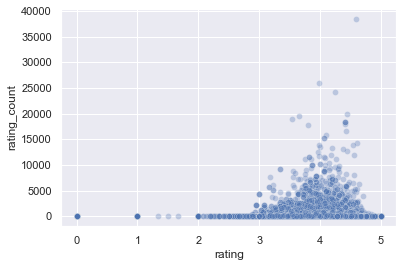

In [35]:
sns.scatterplot(data = fdr_sample1, x = 'rating', y = 'rating_count', alpha = 0.3)

In [36]:
rating_52 = fdr_sample1[fdr_sample1['rating'] == 5]
fdr_sample1.loc[rating_52.index, 'rating_count'].value_counts()

1.0     110
2.0      53
3.0      16
4.0      13
5.0       8
7.0       4
6.0       3
14.0      1
9.0       1
8.0       1
Name: rating_count, dtype: int64

## Creating new features
- Category 항목 : 데이터가 검색어 별로 나온 제품들의 데이터를 합친 것이므로, 검색어 항목을 생성 가능

- 가격 관련 항목이 discount와 retail로 2개로 나누어져 있음  
    -> 할인율을 항목 만들기 (retail_price 항목은 drop)
    
    
- size, color 항목이 제대로 나와있지 않음 (사이즈 및 컬러가 여러개일텐데, 하나씩만 표기되어 있음)
    -> size항목은 표에 있는 상품별 url을 바탕으로 크롤링하여 사이즈 종류의 개수와 사이즈 종류의 항목을 생성
    -> color 항목은 크롤링 실패로 분석에 사용하지 않음

In [37]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
    
#     # 할인률 관련
#     full_data_drop['discount_rate'] = 1 - full_data_drop['discount_price']/full_data_drop['retail_price']
#     df.drop('retail_price', axis  = 1, inplace = True)

In [38]:
### 주석 풀지 말 것 ###

# # size 정보 크롤링 
# # 따로 실행해서 csv로 저장한 후, 해당 csv파일을 이번에 사용하는 데이터셋에 합침 


# from urllib.request import urlopen
# from bs4 import BeautifulSoup
# import requests
# from urllib.error import HTTPError

# # 칼럼 미리 생성
# df['size_var'] = np.nan
# df['size_list'] = np.nan

# # 반복을 통해 상품별 url을 읽고, size 정보를 가져온다. 
# # 에러가 날 경우 다음 순서로 넘어간다.
# # 사이즈 정보를 미리 생성해둔 칼럼에 넣는다.
# for i in range(0, len(df)): 
#     url = df['product_url'][i] 
#     try: html = urlopen(url) 
#     except HTTPError: continue

#     html = urlopen(url)
#     bsObject = BeautifulSoup(html, 'html.parser')

#     x = 0
#     size_list = []
#     # 반복문을 통해 리스트되어있는 사이즈를 하나씩 가져오기. 
#     # 매번 사이즈 개수가 다르기 때문에 while 사용
#     # 그 다음 사이즈 정보가 없으면 반복문 종료
#     while True:
#         try: bsObject.find('div', {'class' : 'WishSelectInput__SelectBoxDropdown-sc-1gl2ax5-3'}).find('div', {'data-index' : x})
#         except AttributeError:
#             break

#         size = bsObject.find('div', {'class' : 'WishSelectInput__SelectBoxDropdown-sc-1gl2ax5-3'}).find('div', {'data-index' : x})
#         if size == None: break
#         size_list.append(size.text)
#         x += 1
#     df['size_var'][i] = len(size_list)
#     df['size_list'][i] = size_list
#     print("\n",i ,size_list, len(size_list))
    
    
# df.to_csv('size_added.csv')

In [39]:
# 크롤링한 파일 불러와서 합치기
url_crawl = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//size_added.csv'
size_crawl = pd.read_csv(url_crawl)
fdr = fdr.reset_index(drop = True)
fdr[['size_var', 'size_list']] = size_crawl[['size_var','size_list']]

## size_var 항목 (추가한 항목)

- 판매하는 사이즈의 개수
- 0부터 168까지 있음. (사이즈의 개수가 168임이 말이 안되므로 이상치가 있다고 판단됨)
- 0은 사이즈 정보가 없는 것 = one size인 줄 알고 1로 바꾸려 했으나, 해당 상품들의 페이지를 직접 들어가보니 매진 상품이었음
    -> 따라서 지금 사이즈 정보를 제대로 얻을 수 없음. 0으로 일단 놔둠
- 너무 높은 이상치의 경우 탐색해보니, 컬러와 사이즈 구분이 제대로 안되어 있고 모두 사이즈 항목에서 구분되어있음. 즉 사이즈 정보만 있는 것이 아님.
- xs, s, m, l, xl, xxl, 3xl, 4xl, 5xl (일반적인 사이즈 구분 8 ~ 9개)
- 9개로만 잡을 경우, 이상치가 1308로 생각보다 많음. 또한, 키즈 사이즈까지 있는 상품들이 있어서 기준을 늘려도 될 듯.
- 결측치는 판매 페이지가 없어졌거나, 사이즈 정보가 아예 없거나(one-size), 크롤링 과정 중 에러로 넘어간 부분.
<br/>
<br/>

**Engineering**
- 일단 전체 데이터의 10%인 824를 기준으로, 824개가 넘는 수부터 이상치로 판단, 그 이전 최대값으로 변환
- 12개까지 정상수치라고 보면, 이상치는 687개, 양호한 수치로 판단되어 13부터는 모두 12로 변환
- 결측치 0으로 대체

In [40]:
# 이상치가 많음
fdr.size_var.unique()

array([  5.,  18.,   7.,   4.,   1.,   9.,   8.,   3.,   6.,   0.,  17.,
        11.,   2.,  nan,  10.,  14.,  13.,  22.,  12.,  21.,  15.,  16.,
        45.,  30.,  27.,  24.,  34.,  38.,  33.,  37.,  44.,  19.,  52.,
        35.,  29.,  36.,  39.,  47.,  25.,  28.,  26.,  59.,  42.,  55.,
        90.,  31., 168.,  48.,  32.,  60.,  68.,  20., 240.,  23.,  78.,
        46.,  43., 102.,  51.,  41.,  40.,  63., 120., 129., 125.,  56.,
       138.,  62.,  50.])

In [41]:
# 이상치 데이터를 탐색해보니, 컬러와 사이즈 구분이 모두 사이즈항목으로만 되어있음. 즉, 사이즈 정보만 있는 것이 아님.
print(fdr.loc[3851, 'size_list'])
print(fdr.loc[3851, 'product_url'])

['1-90(Child)', '2-90(Child)', '3-90(Child)', '4-90(Child)', '5-90(Child)', '6-90(Child)', '7-90(Child)', '8-90(Child)', '1-100(Child)', '2-100(Child)', '3-100(Child)', '4-100(Child)', '5-100(Child)', '6-100(Child)', '7-100(Child)', '8-100(Child)', '1-110(Child)', '2-110(Child)', '3-110(Child)', '4-110(Child)', '5-110(Child)', '6-110(Child)', '7-110(Child)', '8-110(Child)', '1-120(Child)', '2-120(Child)', '3-120(Child)', '4-120(Child)', '5-120(Child)', '6-120(Child)', '7-120(Child)', '8-120(Child)', '1-130(Child)', '2-130(Child)', '3-130(Child)', '4-130(Child)', '5-130(Child)', '6-130(Child)', '7-130(Child)', '8-130(Child)', '1-140(Child)', '1-150(Child)', '1-160(Child)', '2-140(Child)', '2-150(Child)', '2-160(Child)', '3-140(Child)', '3-150(Child)', '3-160(Child)', '4-140(Child)', '4-150(Child)', '4-160(Child)', '5-140(Child)', '5-150(Child)', '5-160(Child)', '6-140(Child)', '6-150(Child)', '6-160(Child)', '7-140(Child)', '7-150(Child)', '7-160(Child)', '8-140(Child)', '8-150(Child)',

In [42]:
# 일단 전체 데이터의 10%인 824를 기준으로, 824개가 넘는 개수부터 이상치로 판단, 그 전 최대값으로 변환
len(fdr) * 0.10

824.0

In [43]:
# xs, s, m, l, xl, xxl, 3xl, 4xl, 5xl (일반적인 사이즈 구분 8 ~ 9개)
# 9개로만 잡을 경우, 이상치가 1308로 생각보다 많음. 또한, 키즈 사이즈까지 있는 상품들이 있어서 기준을 늘려도 될 듯.
print(len(fdr[fdr['size_var'] > 9]))

# 일단 전체 개수의 10%를 기준으로 잡기로 함
# 12개 부터 10% 아래로 내려감
print(len(fdr[fdr['size_var'] > 12]))

1308
687


In [44]:
# def engineering(df):
    
#     # 사이즈 개수 이상치 & 결측치 처리
#     size_over_12 = df[df['size_var'] > 12]
#     df.loc[size_over_12.index, 'size_var'] = 12
#     df.size_var.fillna(0, inplace=True)
    

## drop 시킬 항목
 - 'title', 'title_orig' : 제품명으로 분석에 의미 없음
 - 'discount_price_currency' : retail_price_currency와 중복이므로 드랍
 - 'discount_price_in_original_currency' : 기존 통화에서의 가격은 의미가 없을 것이라 생각됨
 - 'nb_units_purchased_approx' : 전부 결측치
 - 'uses_ad_boosts' : 전부 결측치
 - 'rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count' : 평점 평균과 리뷰 개수 항목이 있으므로 중복될 것.
 - 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'tags' : 전부 결측치
 - 'product_color', 'product_variation_size_id' : 데이터가 제대로 된 데이터가 아님
 - 'product_variation_inventory' : 소비자가 알 수 있는 정보가 아님
 - 'shipping_option_name' : 'shipping_is_express'와 파악할 수 있는 정보가 동일. 중복된 정보
 - 'countries_shipped_to' : 전부 결측치
 - 'inventory_total' : 소비자가 알 수 있는 정보가 아님
 - 'urgency_text' : 'urgency_banner' 항목과 중복된 정보
 - 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id' : 판매자 명으로 분석에 의미 없음
 - 'merchant_has_profile_picture', 'merchant_profile_picture' : 전부 결측치
 - 'product_url', 'product_picture', 'product_id' : 분석에 의미 없음
 - 'size_list' : 어떻게 활용할 지 모르겠음...

In [45]:
fdr.columns

Index(['title', 'title_orig', 'discount_price', 'discount_price_currency',
       'retail_price', 'retail_price_currency',
       'discount_price_in_original_currency', 'nb_cart_orders_approx',
       'nb_units_purchased_approx', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'produc

In [46]:
drop_list = ['title', 'title_orig', 'discount_price_currency', 'discount_price_in_original_currency', 'nb_units_purchased_approx',
            'uses_ad_boosts', 'rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count',
            'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'tags','product_color', 'product_variation_size_id',
            'product_variation_inventory', 'shipping_option_name', 'countries_shipped_to', 'inventory_total', 'urgency_text','merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id',
            'merchant_has_profile_picture', 'merchant_profile_picture', 'product_url', 'product_picture', 'product_id', 'size_list']

## engineering 적용


In [47]:
df = fdr.copy()

In [48]:

def engineering(df):
    # currency 관련 
    CHF_index = df[df['retail_price_currency'] == 'CHF'].index
    df.loc[CHF_index, 'retail_price'] = df.loc[CHF_index, 'retail_price'] * 0.91
    df.loc[CHF_index, 'discount_price'] = df.loc[CHF_index, 'discount_price'] * 0.91
    df.loc[CHF_index, 'shipping_option_price'] = df.loc[CHF_index, 'shipping_option_price'] * 0.91
    
    USD_index = df[df['retail_price_currency'] == 'USD'].index
    df.loc[USD_index, 'retail_price'] = df.loc[USD_index, 'retail_price'] * 0.84
    df.loc[USD_index, 'discount_price'] = df.loc[USD_index, 'discount_price'] * 0.84
    df.loc[USD_index, 'shipping_option_price'] = df.loc[USD_index, 'shipping_option_price'] * 0.84
    
    df.rename(columns={"retail_price_currency": "currency"}, inplace=True)
    
    # price 관련
    no_price_info = df[df['discount_price'] == 0]
    df.drop(no_price_info.index, axis = 0, inplace = True)

    
    # Target (판매량) 관련
    order_under_10 = df[df['nb_cart_orders_approx'] <= 10 ]
    df.loc[order_under_10.index, 'nb_cart_orders_approx'] = 10


    # shipping option 관련
    express_false = df[df['shipping_is_express'] == False]
    express_true = df[df['shipping_is_express'] == True]

    df.loc[express_false.index, 'shipping_is_express'] = 0
    df.loc[express_true.index, 'shipping_is_express'] = 1
    
#     df.drop('shipping_option_name', axis = 1, inplace = True)


    # urgency_banner 관련
    urgency_banner_true = df[df['has_urgency_banner'] == True]
    df.loc[urgency_banner_true.index, 'has_urgency_banner'] = 1
    df['has_urgency_banner'].fillna(0, inplace=True)


    # origin_country 관련
    origin_list = df['origin_country'].unique()
    origin_remain = ['CN', 'US', 'CA']
    origin_list_other = origin_list.tolist()

    for i in origin_remain :
        origin_list_other.remove(i)

    origin_other = df[df['origin_country'].isin(origin_list_other)]
    df.loc[origin_other.index, 'origin_country'] = 'other'
    
    
    #rating_count, rating 관련
    rating_count_0 = df[df['rating_count'] ==0]
    df.loc[rating_count_0.index, 'rating'] = 0


    # 할인률 관련
    df['discount_rate'] = 1 - df['discount_price']/df['retail_price']
    df.drop('retail_price', axis  = 1, inplace = True)


    # 사이즈 개수 이상치 & 결측치 처리
    size_over_12 = df[df['size_var'] > 12]
    df.loc[size_over_12.index, 'size_var'] = 12
    df.size_var.fillna(0, inplace=True)
    
    
    # drop
    df.drop(drop_list, axis = 1, inplace = True)
    
    return df

In [49]:
engineering(df)

,discount_price,currency,nb_cart_orders_approx,rating,rating_count,shipping_option_price,shipping_is_express,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,category,size_var,discount_rate
0,13.00,EUR,10.0,4.343750,32.0,4.00,0,0,CN,5008.0,4.442891,bodysuit,5.0,0.826667
1,4.74,EUR,10.0,4.000000,14.0,2.00,0,1,CN,8.0,4.750000,bodysuit,12.0,0.952600
2,4.00,EUR,10000.0,4.032452,832.0,1.00,0,0,CN,36935.0,4.103506,bodysuit,5.0,0.000000
3,8.00,EUR,10.0,4.000000,1.0,3.00,0,0,CN,22384.0,4.076305,bodysuit,7.0,0.000000
4,14.00,EUR,10.0,4.307692,13.0,4.00,0,0,CN,23754.0,4.103562,bodysuit,4.0,0.831325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,7.28,CHF,1000.0,4.115646,294.0,2.73,0,1,CN,22766.0,4.063867,womens,9.0,0.000000
8236,5.46,CHF,10.0,0.000000,0.0,1.82,0,0,CN,1.0,5.000000,womens,11.0,0.000000
8237,13.65,CHF,10.0,4.285714,7.0,4.55,0,1,CN,20067.0,3.982060,womens,6.0,0.000000
8238,18.20,CHF,10.0,0.000000,0.0,4.55,0,1,CA,1166.0,3.938250,womens,5.0,0.000000


In [50]:
df.isnull().sum()

discount_price           0
currency                 0
nb_cart_orders_approx    0
rating                   0
rating_count             0
shipping_option_price    0
shipping_is_express      0
has_urgency_banner       0
origin_country           0
merchant_rating_count    0
merchant_rating          0
category                 0
size_var                 0
discount_rate            0
dtype: int64

In [51]:
# target, feature 설정
target = 'nb_cart_orders_approx'
feature = df.columns.difference([target], sort = False)

In [52]:
df.columns

Index(['discount_price', 'currency', 'nb_cart_orders_approx', 'rating',
       'rating_count', 'shipping_option_price', 'shipping_is_express',
       'has_urgency_banner', 'origin_country', 'merchant_rating_count',
       'merchant_rating', 'category', 'size_var', 'discount_rate'],
      dtype='object')

In [53]:
columns_order = ['category', 'currency', 'discount_price', 'discount_rate',
       'rating', 'rating_count', 'shipping_option_price',
       'shipping_is_express', 'has_urgency_banner',
       'origin_country', 'merchant_rating_count', 'merchant_rating',
       'size_var','nb_cart_orders_approx' ]

In [54]:
df = df[columns_order]
df

,category,currency,discount_price,discount_rate,rating,rating_count,shipping_option_price,shipping_is_express,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,size_var,nb_cart_orders_approx
0,bodysuit,EUR,13.00,0.826667,4.343750,32.0,4.00,0,0,CN,5008.0,4.442891,5.0,10.0
1,bodysuit,EUR,4.74,0.952600,4.000000,14.0,2.00,0,1,CN,8.0,4.750000,12.0,10.0
2,bodysuit,EUR,4.00,0.000000,4.032452,832.0,1.00,0,0,CN,36935.0,4.103506,5.0,10000.0
3,bodysuit,EUR,8.00,0.000000,4.000000,1.0,3.00,0,0,CN,22384.0,4.076305,7.0,10.0
4,bodysuit,EUR,14.00,0.831325,4.307692,13.0,4.00,0,0,CN,23754.0,4.103562,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,womens,CHF,7.28,0.000000,4.115646,294.0,2.73,0,1,CN,22766.0,4.063867,9.0,1000.0
8236,womens,CHF,5.46,0.000000,0.000000,0.0,1.82,0,0,CN,1.0,5.000000,11.0,10.0
8237,womens,CHF,13.65,0.000000,4.285714,7.0,4.55,0,1,CN,20067.0,3.982060,6.0,10.0
8238,womens,CHF,18.20,0.000000,0.000000,0.0,4.55,0,1,CA,1166.0,3.938250,5.0,10.0


In [192]:
df.to_csv('df.csv')

# Target 분석

- 타겟인 판매량이 분포가 너무 넓은 것 같다.
- 분류 문제인데, 값의 종류가 너무 많다. 회귀 문제였다면 좋았을 것 같다.
- 범위를 좁혀보자

C:\Users\tkryu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nb_cart_orders_approx', ylabel='Density'>

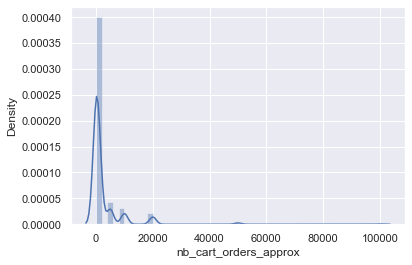

In [55]:
# 타겟인 판매량이 분포가 너무 크다.

sns.distplot(df[target])

In [56]:
df[target].value_counts()

10.0        4420
1000.0      2164
5000.0       716
10000.0      511
20000.0      345
50000.0       62
100000.0      13
Name: nb_cart_orders_approx, dtype: int64

In [57]:
target_over_5000 = df[df[target] >= 5000]
df.loc[target_over_5000.index, target] = 10000
df[target].value_counts()

10.0       4420
1000.0     2164
10000.0    1647
Name: nb_cart_orders_approx, dtype: int64

C:\Users\tkryu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nb_cart_orders_approx', ylabel='Density'>

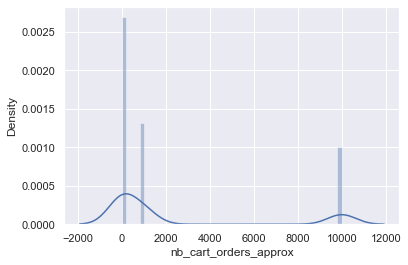

In [58]:
sns.distplot(df[target])

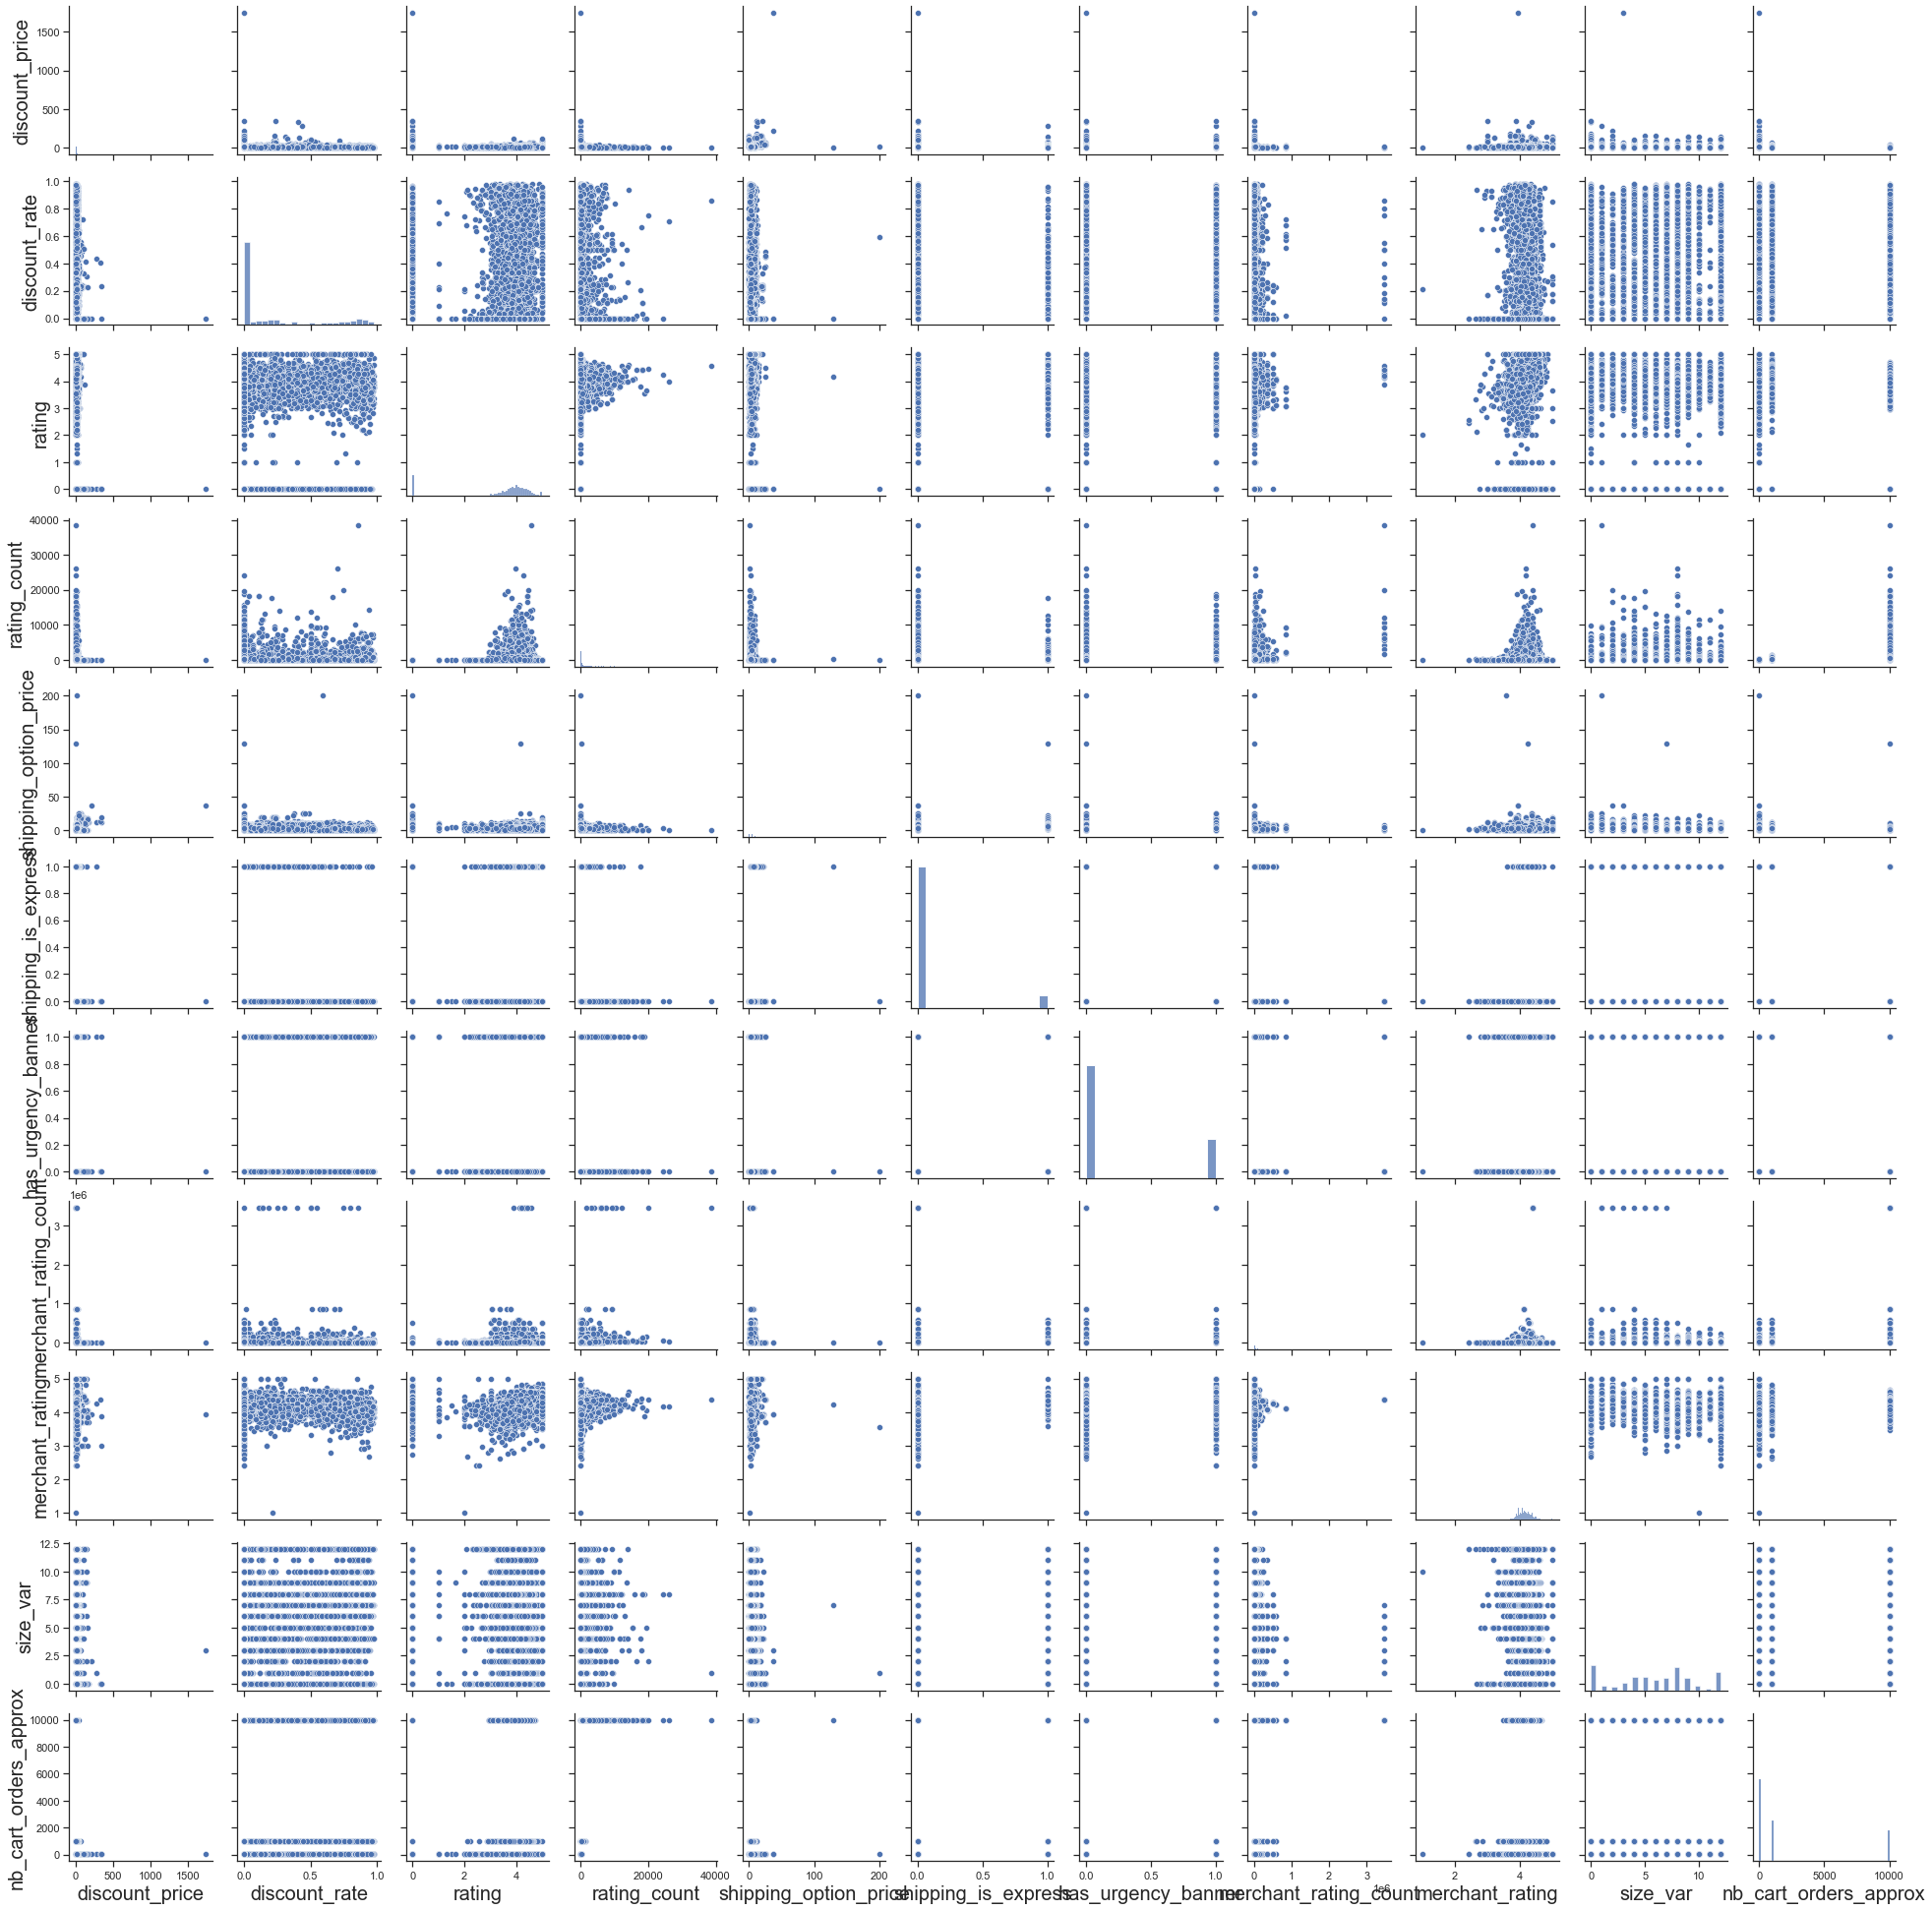

In [59]:
# scatter matrix

sns.set(style="ticks", color_codes=True)
plt.rcParams["axes.labelsize"] = 20
sns.pairplot(df)

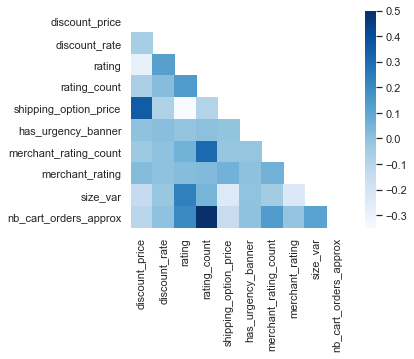

In [60]:
# correlation

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True, cmap="Blues")

<AxesSubplot:>

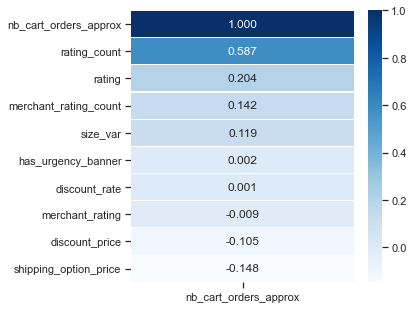

In [61]:
# correlation

corr = df.corr()[[target]].sort_values(by = target, ascending=False)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, fmt="0.3f", linewidths=0.1, ax=ax, cmap='Blues')

<AxesSubplot:xlabel='rating_count', ylabel='nb_cart_orders_approx'>

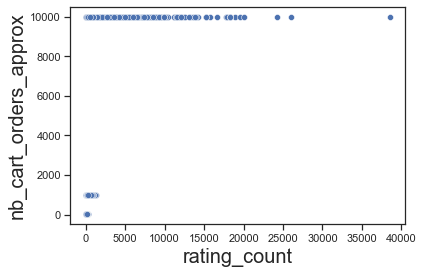

In [62]:
sns.scatterplot(data = df, x = 'rating_count', y = target)

<AxesSubplot:xlabel='category', ylabel='nb_cart_orders_approx'>

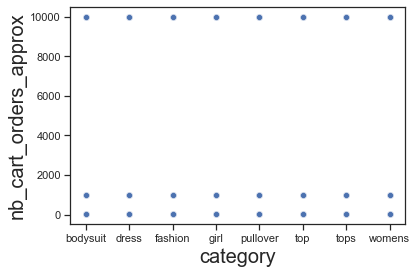

In [64]:
sns.scatterplot(data = df, x = 'category', y = df[target])

# 모델 만들기

In [271]:
baseline = df[target].value_counts(normalize=True).index[0]
baseline_accuracy = df[target].value_counts(normalize=True).values[0]
baseline

In [66]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 2)
train, val = train_test_split(train_val, train_size = 0.8, test_size = 0.2, random_state = 2)

X_train = train[feature]
y_train = train[target]
X_val = val[feature]
y_val = val[target]
X_test = test[feature]
y_test = test[target]

In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from category_encoders import CatBoostEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, accuracy_score

In [68]:
# catboost 모델

pipe = Pipeline([
    ('prep',make_pipeline(CatBoostEncoder())),
    ('cat', CatBoostClassifier(iterations = 500
                               , random_state = 2
                               , od_type = 'Iter'
                               , od_wait = 20
                               , learning_rate = 0.2))])

pipe.fit(X_train, y_train)



0:	learn: 0.8429188	total: 150ms	remaining: 1m 14s
1:	learn: 0.6902990	total: 155ms	remaining: 38.6s
2:	learn: 0.5841035	total: 159ms	remaining: 26.4s
3:	learn: 0.5130934	total: 164ms	remaining: 20.4s
4:	learn: 0.4581973	total: 169ms	remaining: 16.7s
5:	learn: 0.4135834	total: 173ms	remaining: 14.3s
6:	learn: 0.3760757	total: 178ms	remaining: 12.5s
7:	learn: 0.3416914	total: 182ms	remaining: 11.2s
8:	learn: 0.3174360	total: 187ms	remaining: 10.2s
9:	learn: 0.2985637	total: 191ms	remaining: 9.38s
10:	learn: 0.2818366	total: 196ms	remaining: 8.71s
11:	learn: 0.2695886	total: 201ms	remaining: 8.16s
12:	learn: 0.2597555	total: 205ms	remaining: 7.69s
13:	learn: 0.2494697	total: 210ms	remaining: 7.28s
14:	learn: 0.2412949	total: 214ms	remaining: 6.93s
15:	learn: 0.2351466	total: 219ms	remaining: 6.62s
16:	learn: 0.2285581	total: 223ms	remaining: 6.35s
17:	learn: 0.2235262	total: 228ms	remaining: 6.1s
18:	learn: 0.2193278	total: 232ms	remaining: 5.88s
19:	learn: 0.2156863	total: 237ms	remaini

178:	learn: 0.1048551	total: 1.02s	remaining: 1.83s
179:	learn: 0.1045424	total: 1.03s	remaining: 1.83s
180:	learn: 0.1043198	total: 1.03s	remaining: 1.82s
181:	learn: 0.1041063	total: 1.04s	remaining: 1.82s
182:	learn: 0.1039367	total: 1.05s	remaining: 1.82s
183:	learn: 0.1036415	total: 1.05s	remaining: 1.81s
184:	learn: 0.1033442	total: 1.06s	remaining: 1.81s
185:	learn: 0.1029778	total: 1.07s	remaining: 1.8s
186:	learn: 0.1027674	total: 1.07s	remaining: 1.79s
187:	learn: 0.1022904	total: 1.08s	remaining: 1.79s
188:	learn: 0.1019993	total: 1.08s	remaining: 1.78s
189:	learn: 0.1017787	total: 1.09s	remaining: 1.77s
190:	learn: 0.1014556	total: 1.09s	remaining: 1.77s
191:	learn: 0.1012356	total: 1.1s	remaining: 1.76s
192:	learn: 0.1010468	total: 1.1s	remaining: 1.75s
193:	learn: 0.1005466	total: 1.11s	remaining: 1.75s
194:	learn: 0.1001583	total: 1.11s	remaining: 1.74s
195:	learn: 0.0998856	total: 1.12s	remaining: 1.73s
196:	learn: 0.0991634	total: 1.12s	remaining: 1.73s
197:	learn: 0.0

359:	learn: 0.0609931	total: 1.89s	remaining: 735ms
360:	learn: 0.0607979	total: 1.89s	remaining: 729ms
361:	learn: 0.0606662	total: 1.9s	remaining: 724ms
362:	learn: 0.0604735	total: 1.9s	remaining: 719ms
363:	learn: 0.0601563	total: 1.91s	remaining: 713ms
364:	learn: 0.0599431	total: 1.91s	remaining: 708ms
365:	learn: 0.0597350	total: 1.92s	remaining: 702ms
366:	learn: 0.0595218	total: 1.92s	remaining: 697ms
367:	learn: 0.0593649	total: 1.93s	remaining: 691ms
368:	learn: 0.0591114	total: 1.93s	remaining: 686ms
369:	learn: 0.0589166	total: 1.94s	remaining: 680ms
370:	learn: 0.0586718	total: 1.94s	remaining: 675ms
371:	learn: 0.0585331	total: 1.95s	remaining: 670ms
372:	learn: 0.0583610	total: 1.95s	remaining: 664ms
373:	learn: 0.0582715	total: 1.96s	remaining: 659ms
374:	learn: 0.0580930	total: 1.96s	remaining: 653ms
375:	learn: 0.0579664	total: 1.97s	remaining: 648ms
376:	learn: 0.0578863	total: 1.97s	remaining: 643ms
377:	learn: 0.0577429	total: 1.97s	remaining: 637ms
378:	learn: 0.

Pipeline(steps=[('prep',
                 Pipeline(steps=[('catboostencoder',
                                  CatBoostEncoder(cols=['currency',
                                                        'shipping_is_express',
                                                        'origin_country',
                                                        'category']))])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x000001FAD625FD60>)])

In [69]:
y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)
y_pred_test = pipe.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred_val)
acc_test = accuracy_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train, average = 'micro')
f1_val = f1_score(y_val, y_pred_val, average = 'micro')
f1_test = f1_score(y_test, y_pred_test, average = 'micro')

y_pred_proba_train = pipe.predict_proba(X_train)
y_pred_proba_val = pipe.predict_proba(X_val)
y_pred_proba_test = pipe.predict_proba(X_test)

auc_train = roc_auc_score(y_train, y_pred_proba_train, multi_class = 'ovr')
auc_val = roc_auc_score(y_val, y_pred_proba_val, multi_class = 'ovr')
auc_test = roc_auc_score(y_test, y_pred_proba_test, multi_class = 'ovr')

print("accuracy_train : ", acc_train)
print("accuracy_val : ", acc_val)
print("acc_difference : ", acc_train - acc_val)
# print("accuracy_test : ", acc_test)
print("----------")

print("f1_train : ", f1_train)
print("f1_val : ", f1_val)
print("f1_difference : ", f1_train - f1_val)
# print("f1_test : ", f1_test)
print("----------")

print("auc_train : ", auc_train)
print("auc_val : ", auc_val)
print("auc_difference : ", auc_train - auc_val)
# print("auc_test : ", auc_test)

accuracy_train :  0.9614581355610404
accuracy_val :  0.9126803340926348
acc_difference :  0.0487778014684056
----------
f1_train :  0.9614581355610404
f1_val :  0.9126803340926348
f1_difference :  0.0487778014684056
----------
auc_train :  0.9965248260739313
auc_val :  0.9824439697088195
auc_difference :  0.014080856365111805


accuracy_train :  0.9599392443516234  
accuracy_val :  0.9126803340926348  

----------
f1_train :  0.9599392443516234  
f1_val :  0.9126803340926348  

----------
auc_train :  0.9960779090500574  
auc_val :  0.9827755239397532  


In [70]:
# xgboost 모델
from xgboost import XGBClassifier

pipe_xgb = Pipeline([
    ('prep',make_pipeline(CatBoostEncoder())),
    ('xgb', XGBClassifier(n_estimator = 500
                               , random_state = 2
                               , n_jobs = -1
                               , learning_rate = 0.2))])

pipe_xgb.fit(X_train, y_train)

C:\Users\tkryu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('prep',
                 Pipeline(steps=[('catboostencoder',
                                  CatBoostEncoder(cols=['currency',
                                                        'shipping_is_express',
                                                        'origin_country',
                                                        'category']))])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimator=500,
                               n_estimators=100, n_jobs=-1, n

In [71]:
y_pred_train_xgb = pipe_xgb.predict(X_train)
y_pred_val_xgb = pipe_xgb.predict(X_val)
y_pred_test_xgb = pipe_xgb.predict(X_test)

acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
acc_val_xgb = accuracy_score(y_val, y_pred_val_xgb)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

f1_train_xgb = f1_score(y_train, y_pred_train_xgb, average = 'micro')
f1_val_xgb = f1_score(y_val, y_pred_val_xgb, average = 'micro')
f1_test_xgb = f1_score(y_test, y_pred_test_xgb, average = 'micro')

y_pred_proba_train_xgb = pipe_xgb.predict_proba(X_train)
y_pred_proba_val_xgb = pipe_xgb.predict_proba(X_val)
y_pred_proba_test_xgb = pipe_xgb.predict_proba(X_test)

auc_train_xgb = roc_auc_score(y_train, y_pred_proba_train_xgb, multi_class = 'ovr')
auc_val_xgb = roc_auc_score(y_val, y_pred_proba_val_xgb, multi_class = 'ovr')
auc_test_xgb = roc_auc_score(y_test, y_pred_proba_test_xgb, multi_class = 'ovr')

print("accuracy_train : ", acc_train_xgb)
print("accuracy_val : ", acc_val_xgb)
print("acc_difference : ", acc_train_xgb - acc_val_xgb)
# print("accuracy_test : ", acc_test_xgb)
print("----------")

print("f1_train : ", f1_train_xgb)
print("f1_val : ", f1_val_xgb)
print("f1_difference : ", f1_train_xgb - f1_val_xgb)
# print("f1_test : ", f1_test_xgb)
print("----------")

print("auc_train : ", auc_train_xgb)
print("auc_val : ", auc_val_xgb)
print("auc_difference : ", auc_train_xgb - auc_val_xgb)
# print("auc_test : ", auc_test_xgb)

accuracy_train :  0.9707613442187203
accuracy_val :  0.914958238420653
acc_difference :  0.05580310579806724
----------
f1_train :  0.9707613442187203
f1_val :  0.914958238420653
f1_difference :  0.05580310579806724
----------
auc_train :  0.9978725294633829
auc_val :  0.9831383837523057
auc_difference :  0.014734145711077229


In [81]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps['cat'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

X_val_transformed = pipe.named_steps['prep'].transform(X_val)
permuter.fit(X_val_transformed, y_val)

feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.5099 ± 0.0206,rating_count
0.0097 ± 0.0060,merchant_rating_count
0.0084 ± 0.0058,discount_price
0.0056 ± 0.0048,rating
0.0047 ± 0.0083,merchant_rating
0.0044 ± 0.0032,shipping_option_price
0.0033 ± 0.0046,size_var
0.0033 ± 0.0050,category
0.0018 ± 0.0031,currency
0.0015 ± 0.0029,discount_rate


**catboost 모델이 같은 조건에서 과적합이 조금 더 적다.**

**근데 정확도나 점수 자체가 너무 높은 걸 보니, 문제가 너무 쉬운 문제 였다는 생각이 들었다**

**그 원인을 생각해보면**
1. 타겟값의 카디널리티가 너무 낮다. (어쩔 수 없이 판매량을 분류문제로 만들고, 10, 1000, 10000 의 항목으로 통합시켰는데 이 때문에 문제가 너무 쉬워진 것 같다. 
2. 정보의 누수가 있다. 특성중요도를 보면 rating count가 높은 중요도를 보이는데, 생각해보면 리뷰 수가 많다는 것은 그만큼 많이 팔렸다는 것을 방증할 것이다.


## 우선 타겟값의 분류를 조금 더 세분화해보자

In [72]:
df2 = fdr.copy()
engineering(df2)
df2 = df2[columns_order]

In [74]:
df2[target].value_counts()

10.0        4420
1000.0      2164
5000.0       716
10000.0      511
20000.0      345
50000.0       62
100000.0      13
Name: nb_cart_orders_approx, dtype: int64

In [75]:
target_over_20000 = df2[df2[target] >= 20000]
df2.loc[target_over_20000.index, target] = 20000
df2[target].value_counts()

10.0       4420
1000.0     2164
5000.0      716
10000.0     511
20000.0     420
Name: nb_cart_orders_approx, dtype: int64

In [76]:

train_val2, test2 = train_test_split(df2, train_size = 0.8, test_size = 0.2, random_state = 2)
train2, val2 = train_test_split(train_val2, train_size = 0.8, test_size = 0.2, random_state = 2)

X_train2 = train2[feature]
y_train2 = train2[target]
X_val2 = val2[feature]
y_val2 = val2[target]
X_test2 = test2[feature]
y_test2 = test2[target]

In [77]:
pipe_cat2 = Pipeline([
    ('prep',make_pipeline(CatBoostEncoder())),
    ('cat', CatBoostClassifier(iterations = 500
                               , random_state = 2
                               , od_type = 'Iter'
                               , od_wait = 20
                               , learning_rate = 0.2))])

pipe_cat2.fit(X_train2, y_train2)

0:	learn: 1.1450442	total: 9.78ms	remaining: 4.88s
1:	learn: 0.9441202	total: 17.1ms	remaining: 4.25s
2:	learn: 0.7977758	total: 25ms	remaining: 4.15s
3:	learn: 0.7104216	total: 33.2ms	remaining: 4.12s
4:	learn: 0.6377053	total: 40.9ms	remaining: 4.05s
5:	learn: 0.5805633	total: 48.2ms	remaining: 3.97s
6:	learn: 0.5364986	total: 55.7ms	remaining: 3.92s
7:	learn: 0.4987004	total: 63.1ms	remaining: 3.88s
8:	learn: 0.4660772	total: 70.5ms	remaining: 3.84s
9:	learn: 0.4398481	total: 77.9ms	remaining: 3.82s
10:	learn: 0.4165471	total: 85.3ms	remaining: 3.79s
11:	learn: 0.4011812	total: 92.7ms	remaining: 3.77s
12:	learn: 0.3868121	total: 100ms	remaining: 3.75s
13:	learn: 0.3773995	total: 108ms	remaining: 3.73s
14:	learn: 0.3685794	total: 115ms	remaining: 3.71s
15:	learn: 0.3599053	total: 122ms	remaining: 3.7s
16:	learn: 0.3511757	total: 130ms	remaining: 3.69s
17:	learn: 0.3423676	total: 138ms	remaining: 3.68s
18:	learn: 0.3370619	total: 145ms	remaining: 3.67s
19:	learn: 0.3318153	total: 153m

165:	learn: 0.1636073	total: 1.46s	remaining: 2.93s
166:	learn: 0.1631120	total: 1.47s	remaining: 2.92s
167:	learn: 0.1624557	total: 1.48s	remaining: 2.92s
168:	learn: 0.1620162	total: 1.49s	remaining: 2.91s
169:	learn: 0.1613711	total: 1.49s	remaining: 2.9s
170:	learn: 0.1604672	total: 1.5s	remaining: 2.89s
171:	learn: 0.1601508	total: 1.51s	remaining: 2.88s
172:	learn: 0.1598253	total: 1.52s	remaining: 2.88s
173:	learn: 0.1589399	total: 1.53s	remaining: 2.87s
174:	learn: 0.1583261	total: 1.54s	remaining: 2.86s
175:	learn: 0.1579353	total: 1.55s	remaining: 2.85s
176:	learn: 0.1575099	total: 1.56s	remaining: 2.85s
177:	learn: 0.1569541	total: 1.57s	remaining: 2.84s
178:	learn: 0.1563588	total: 1.58s	remaining: 2.83s
179:	learn: 0.1560022	total: 1.59s	remaining: 2.82s
180:	learn: 0.1556725	total: 1.6s	remaining: 2.82s
181:	learn: 0.1553598	total: 1.61s	remaining: 2.81s
182:	learn: 0.1542991	total: 1.62s	remaining: 2.8s
183:	learn: 0.1541326	total: 1.63s	remaining: 2.79s
184:	learn: 0.15

334:	learn: 0.0967096	total: 2.89s	remaining: 1.42s
335:	learn: 0.0962493	total: 2.9s	remaining: 1.41s
336:	learn: 0.0958600	total: 2.91s	remaining: 1.41s
337:	learn: 0.0957175	total: 2.91s	remaining: 1.4s
338:	learn: 0.0955253	total: 2.92s	remaining: 1.39s
339:	learn: 0.0953774	total: 2.93s	remaining: 1.38s
340:	learn: 0.0951420	total: 2.94s	remaining: 1.37s
341:	learn: 0.0946590	total: 2.94s	remaining: 1.36s
342:	learn: 0.0944028	total: 2.95s	remaining: 1.35s
343:	learn: 0.0941082	total: 2.96s	remaining: 1.34s
344:	learn: 0.0938383	total: 2.97s	remaining: 1.33s
345:	learn: 0.0935291	total: 2.98s	remaining: 1.32s
346:	learn: 0.0932915	total: 2.98s	remaining: 1.31s
347:	learn: 0.0931149	total: 2.99s	remaining: 1.31s
348:	learn: 0.0929467	total: 3s	remaining: 1.3s
349:	learn: 0.0925562	total: 3s	remaining: 1.29s
350:	learn: 0.0922689	total: 3.01s	remaining: 1.28s
351:	learn: 0.0921880	total: 3.02s	remaining: 1.27s
352:	learn: 0.0918513	total: 3.03s	remaining: 1.26s
353:	learn: 0.0915405

496:	learn: 0.0631074	total: 4.14s	remaining: 25ms
497:	learn: 0.0629292	total: 4.15s	remaining: 16.7ms
498:	learn: 0.0627246	total: 4.16s	remaining: 8.33ms
499:	learn: 0.0625911	total: 4.17s	remaining: 0us


Pipeline(steps=[('prep',
                 Pipeline(steps=[('catboostencoder',
                                  CatBoostEncoder(cols=['currency',
                                                        'shipping_is_express',
                                                        'origin_country',
                                                        'category']))])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x000001FAD6414D30>)])

In [78]:
y_pred_train_cat2 = pipe_cat2.predict(X_train2)
y_pred_val_cat2 = pipe_cat2.predict(X_val2)
y_pred_test_cat2 = pipe_cat2.predict(X_test2)

acc_train_cat2 = accuracy_score(y_train2, y_pred_train_cat2)
acc_val_cat2 = accuracy_score(y_val2, y_pred_val_cat2)
acc_test_cat2 = accuracy_score(y_test2, y_pred_test_cat2)

f1_train_cat2 = f1_score(y_train2, y_pred_train_cat2, average = 'micro')
f1_val_cat2 = f1_score(y_val2, y_pred_val_cat2, average = 'micro')
f1_test_cat2 = f1_score(y_test2, y_pred_test_cat2, average = 'micro')

y_pred_proba_train_cat2 = pipe_cat2.predict_proba(X_train2)
y_pred_proba_val_cat2 = pipe_cat2.predict_proba(X_val2)
y_pred_proba_test_cat2 = pipe_cat2.predict_proba(X_test2)

auc_train_cat2 = roc_auc_score(y_train2, y_pred_proba_train_cat2, multi_class = 'ovr')
auc_val_cat2 = roc_auc_score(y_val2, y_pred_proba_val_cat2, multi_class = 'ovr')
auc_test_cat2 = roc_auc_score(y_test2, y_pred_proba_test_cat2, multi_class = 'ovr')

print("accuracy_train : ", acc_train_cat2)
print("accuracy_val : ", acc_val_cat2)
print("acc_difference : ", acc_train_cat2 - acc_val_cat2)
# print("accuracy_test : ", acc_test)
print("----------")

print("f1_train : ", f1_train_cat2)
print("f1_val : ", f1_val_cat2)
print("f1_difference : ", f1_train_cat2 - f1_val_cat2)
# print("f1_test : ", f1_test)
print("----------")

print("auc_train : ", auc_train_cat2)
print("auc_val : ", auc_val_cat2)
print("auc_difference : ", auc_train_cat2 - auc_val_cat2)
# print("auc_test : ", auc_test)

accuracy_train :  0.9451300550598063
accuracy_val :  0.876993166287016
acc_difference :  0.06813688877279034
----------
f1_train :  0.9451300550598063
f1_val :  0.876993166287016
f1_difference :  0.06813688877279034
----------
auc_train :  0.9958185850303645
auc_val :  0.978634094684924
auc_difference :  0.01718449034544045


## rating_count 특성을 지워보자


In [85]:
feature2 = feature.copy()
feature2.tolist

<bound method IndexOpsMixin.tolist of Index(['discount_price', 'currency', 'rating', 'rating_count',
       'shipping_option_price', 'shipping_is_express', 'has_urgency_banner',
       'origin_country', 'merchant_rating_count', 'merchant_rating',
       'category', 'size_var', 'discount_rate'],
      dtype='object')>

In [94]:
feature2 = []
for i in feature:
    feature2.append(i)
    
feature2.remove('rating_count')

In [97]:
X_train3 = train[feature2]
y_train3 = train[target]
X_val3 = val[feature2]
y_val3 = val[target]
X_test3 = test[feature2]
y_test3 = test[target]

In [98]:
pipe_cat3 = Pipeline([
    ('prep',make_pipeline(CatBoostEncoder())),
    ('cat', CatBoostClassifier(iterations = 500
                               , random_state = 2
                               , od_type = 'Iter'
                               , od_wait = 20
                               , learning_rate = 0.2))])

pipe_cat3.fit(X_train3, y_train3)

0:	learn: 1.0106245	total: 5.17ms	remaining: 2.58s
1:	learn: 0.9510472	total: 9.6ms	remaining: 2.39s
2:	learn: 0.9075650	total: 14.2ms	remaining: 2.35s
3:	learn: 0.8767377	total: 18.5ms	remaining: 2.29s
4:	learn: 0.8519067	total: 22.9ms	remaining: 2.27s
5:	learn: 0.8311230	total: 27.2ms	remaining: 2.24s
6:	learn: 0.8164969	total: 31.6ms	remaining: 2.23s
7:	learn: 0.8034498	total: 36ms	remaining: 2.21s
8:	learn: 0.7924600	total: 40.4ms	remaining: 2.2s
9:	learn: 0.7837460	total: 44.7ms	remaining: 2.19s
10:	learn: 0.7755802	total: 49.2ms	remaining: 2.19s
11:	learn: 0.7669759	total: 53.6ms	remaining: 2.18s
12:	learn: 0.7612487	total: 57.9ms	remaining: 2.17s
13:	learn: 0.7557150	total: 62.3ms	remaining: 2.16s
14:	learn: 0.7517299	total: 66.7ms	remaining: 2.16s
15:	learn: 0.7464884	total: 71ms	remaining: 2.15s
16:	learn: 0.7427248	total: 75.6ms	remaining: 2.15s
17:	learn: 0.7390780	total: 79.9ms	remaining: 2.14s
18:	learn: 0.7346117	total: 84.2ms	remaining: 2.13s
19:	learn: 0.7306280	total: 

167:	learn: 0.4980648	total: 877ms	remaining: 1.73s
168:	learn: 0.4970186	total: 884ms	remaining: 1.73s
169:	learn: 0.4954488	total: 890ms	remaining: 1.73s
170:	learn: 0.4938885	total: 898ms	remaining: 1.73s
171:	learn: 0.4924055	total: 906ms	remaining: 1.73s
172:	learn: 0.4917359	total: 915ms	remaining: 1.73s
173:	learn: 0.4906352	total: 924ms	remaining: 1.73s
174:	learn: 0.4901314	total: 935ms	remaining: 1.74s
175:	learn: 0.4892805	total: 943ms	remaining: 1.74s
176:	learn: 0.4884823	total: 954ms	remaining: 1.74s
177:	learn: 0.4875987	total: 961ms	remaining: 1.74s
178:	learn: 0.4865021	total: 969ms	remaining: 1.74s
179:	learn: 0.4858546	total: 977ms	remaining: 1.74s
180:	learn: 0.4849862	total: 986ms	remaining: 1.74s
181:	learn: 0.4843563	total: 994ms	remaining: 1.74s
182:	learn: 0.4836700	total: 1s	remaining: 1.74s
183:	learn: 0.4828557	total: 1.01s	remaining: 1.74s
184:	learn: 0.4809698	total: 1.02s	remaining: 1.74s
185:	learn: 0.4800770	total: 1.03s	remaining: 1.74s
186:	learn: 0.4

359:	learn: 0.3351078	total: 1.92s	remaining: 745ms
360:	learn: 0.3345095	total: 1.92s	remaining: 740ms
361:	learn: 0.3339537	total: 1.93s	remaining: 735ms
362:	learn: 0.3333565	total: 1.93s	remaining: 729ms
363:	learn: 0.3329627	total: 1.94s	remaining: 724ms
364:	learn: 0.3321119	total: 1.94s	remaining: 718ms
365:	learn: 0.3315035	total: 1.95s	remaining: 713ms
366:	learn: 0.3308677	total: 1.95s	remaining: 707ms
367:	learn: 0.3295052	total: 1.96s	remaining: 702ms
368:	learn: 0.3285581	total: 1.96s	remaining: 696ms
369:	learn: 0.3277440	total: 1.97s	remaining: 691ms
370:	learn: 0.3269151	total: 1.97s	remaining: 686ms
371:	learn: 0.3264216	total: 1.98s	remaining: 680ms
372:	learn: 0.3257898	total: 1.98s	remaining: 675ms
373:	learn: 0.3251968	total: 1.99s	remaining: 669ms
374:	learn: 0.3244562	total: 1.99s	remaining: 664ms
375:	learn: 0.3238997	total: 2s	remaining: 658ms
376:	learn: 0.3230368	total: 2s	remaining: 653ms
377:	learn: 0.3220303	total: 2s	remaining: 647ms
378:	learn: 0.3213798

Pipeline(steps=[('prep',
                 Pipeline(steps=[('catboostencoder',
                                  CatBoostEncoder(cols=['currency',
                                                        'shipping_is_express',
                                                        'origin_country',
                                                        'category']))])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x000001FAD6ADBA00>)])

In [99]:
y_pred_train_cat3 = pipe_cat3.predict(X_train3)
y_pred_val_cat3 = pipe_cat3.predict(X_val3)
y_pred_test_cat3 = pipe_cat3.predict(X_test3)

acc_train_cat3 = accuracy_score(y_train3, y_pred_train_cat3)
acc_val_cat3 = accuracy_score(y_val3, y_pred_val_cat3)
acc_test_cat3 = accuracy_score(y_test3, y_pred_test_cat3)

f1_train_cat3 = f1_score(y_train3, y_pred_train_cat3, average = 'micro')
f1_val_cat3 = f1_score(y_val3, y_pred_val_cat3, average = 'micro')
f1_test_cat3 = f1_score(y_test3, y_pred_test_cat3, average = 'micro')

y_pred_proba_train_cat3 = pipe_cat3.predict_proba(X_train3)
y_pred_proba_val_cat3 = pipe_cat3.predict_proba(X_val3)
y_pred_proba_test_cat3 = pipe_cat3.predict_proba(X_test3)

auc_train_cat3 = roc_auc_score(y_train3, y_pred_proba_train_cat3, multi_class = 'ovr')
auc_val_cat3 = roc_auc_score(y_val3, y_pred_proba_val_cat3, multi_class = 'ovr')
auc_test_cat3 = roc_auc_score(y_test3, y_pred_proba_test_cat3, multi_class = 'ovr')

print("accuracy_train : ", acc_train_cat3)
print("accuracy_val : ", acc_val_cat3)
print("acc_difference : ", acc_train_cat3 - acc_val_cat3)
# print("accuracy_test : ", acc_test)
print("----------")

print("f1_train : ", f1_train_cat3)
print("f1_val : ", f1_val_cat3)
print("f1_difference : ", f1_train_cat3 - f1_val_cat3)
# print("f1_test : ", f1_test)
print("----------")

print("auc_train : ", auc_train_cat3)
print("auc_val : ", auc_val_cat3)
print("auc_difference : ", auc_train_cat3 - auc_val_cat3)
# print("auc_test : ", auc_test)

accuracy_train :  0.7750142396050883
accuracy_val :  0.6203492786636294
acc_difference :  0.15466496094145887
----------
f1_train :  0.7750142396050883
f1_val :  0.6203492786636294
f1_difference :  0.15466496094145887
----------
auc_train :  0.915757613636541
auc_val :  0.7950916127507691
auc_difference :  0.12066600088577184


In [100]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe_cat3.named_steps['cat'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

X_val3_transformed = pipe_cat3.named_steps['prep'].transform(X_val3)
permuter.fit(X_val3_transformed, y_val3)

feature_names = X_val3.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0811 ± 0.0087,merchant_rating_count
0.0781 ± 0.0207,rating
0.0258 ± 0.0159,merchant_rating
0.0231 ± 0.0079,discount_rate
0.0143 ± 0.0138,category
0.0131 ± 0.0095,shipping_option_price
0.0070 ± 0.0115,size_var
0.0038 ± 0.0080,discount_price
0.0017 ± 0.0026,has_urgency_banner
0.0014 ± 0.0065,currency


**과적합이 많이 일어나는 것을 볼 수 있다**

**early stopping을 사용해 과적합을 줄여보자**

In [249]:
# pipe_cat4 = Pipeline([
#     ('prep',make_pipeline(CatBoostEncoder())),
#     ('cat', CatBoostClassifier(iterations = 1000
#                                , random_state = 2
#                                , early_stopping_rounds = 10
#                                , loss_function = 'MultiClass'
#                                , eval_set = (X_val3, y_val3)
#                                , learning_rate = 0.2))])

# pipe_cat4.fit(X_train3, y_train3)

encoder = CatBoostEncoder()

X_train3_encoded = encoder.fit_transform(X_train3, y_train3)
X_val3_encoded = encoder.transform(X_val3, y_val3)
X_test3_encoded = encoder.transform(X_test3, y_test3)

cat4 = CatBoostClassifier(iterations = 1000
                            , random_state = 2
                            , early_stopping_rounds = 10
                            , loss_function = 'MultiClass'
                            , learning_rate = 0.2)

cat4.fit(X_train3_encoded, y_train3,
             eval_set = (X_val3_encoded, y_val3),)
#              use_best_model = True)

0:	learn: 1.0106245	test: 1.0209807	best: 1.0209807 (0)	total: 5.12ms	remaining: 5.12s
1:	learn: 0.9510472	test: 0.9738517	best: 0.9738517 (1)	total: 9.57ms	remaining: 4.78s
2:	learn: 0.9075650	test: 0.9371899	best: 0.9371899 (2)	total: 14.3ms	remaining: 4.76s
3:	learn: 0.8767377	test: 0.9117944	best: 0.9117944 (3)	total: 18.8ms	remaining: 4.67s
4:	learn: 0.8519067	test: 0.8902686	best: 0.8902686 (4)	total: 23.2ms	remaining: 4.62s
5:	learn: 0.8311230	test: 0.8704204	best: 0.8704204 (5)	total: 27.9ms	remaining: 4.63s
6:	learn: 0.8164969	test: 0.8595307	best: 0.8595307 (6)	total: 33.1ms	remaining: 4.69s
7:	learn: 0.8034498	test: 0.8487189	best: 0.8487189 (7)	total: 37.6ms	remaining: 4.67s
8:	learn: 0.7924600	test: 0.8413339	best: 0.8413339 (8)	total: 42.5ms	remaining: 4.68s
9:	learn: 0.7837460	test: 0.8350880	best: 0.8350880 (9)	total: 47.4ms	remaining: 4.69s
10:	learn: 0.7755802	test: 0.8279803	best: 0.8279803 (10)	total: 52.2ms	remaining: 4.69s
11:	learn: 0.7669759	test: 0.8219296	best

In [250]:
y_pred_train_cat4 = cat4.predict(X_train3_encoded)
y_pred_val_cat4 = cat4.predict(X_val3_encoded)
y_pred_test_cat4 = cat4.predict(X_test3_encoded)

acc_train_cat4 = accuracy_score(y_train3, y_pred_train_cat4)
acc_val_cat4 = accuracy_score(y_val3, y_pred_val_cat4)
acc_test_cat4 = accuracy_score(y_test3, y_pred_test_cat4)

f1_train_cat4 = f1_score(y_train3, y_pred_train_cat4, average = 'micro')
f1_val_cat4 = f1_score(y_val3, y_pred_val_cat4, average = 'micro')
f1_test_cat4 = f1_score(y_test3, y_pred_test_cat4, average = 'micro')

y_pred_proba_train_cat4 = cat4.predict_proba(X_train3_encoded)
y_pred_proba_val_cat4 = cat4.predict_proba(X_val3_encoded)
y_pred_proba_test_cat4 = cat4.predict_proba(X_test3_encoded)

auc_train_cat4 = roc_auc_score(y_train3, y_pred_proba_train_cat4, multi_class = 'ovr')
auc_val_cat4 = roc_auc_score(y_val3, y_pred_proba_val_cat4, multi_class = 'ovr')
auc_test_cat4 = roc_auc_score(y_test3, y_pred_proba_test_cat4, multi_class = 'ovr')

print("accuracy_train : ", acc_train_cat4)
print("accuracy_val : ", acc_val_cat4)
print("acc_difference : ", acc_train_cat4 - acc_val_cat4)
print("accuracy_test : ", acc_test_cat4)
print("----------")

print("f1_train : ", f1_train_cat4)
print("f1_val : ", f1_val_cat4)
print("f1_difference : ", f1_train_cat4 - f1_val_cat4)
print("f1_test : ", f1_test_cat4)
print("----------")

print("auc_train : ", auc_train_cat4)
print("auc_val : ", auc_val_cat4)
print("auc_difference : ", auc_train_cat4 - auc_val_cat4)
print("auc_test : ", auc_test_cat4)

accuracy_train :  0.7172963736472375
accuracy_val :  0.6089597570235383
acc_difference :  0.1083366166236992
accuracy_test :  0.6302367941712204
----------
f1_train :  0.7172963736472375
f1_val :  0.6089597570235383
f1_difference :  0.1083366166236992
f1_test :  0.6302367941712204
----------
auc_train :  0.8780686269242164
auc_val :  0.7846371303222973
auc_difference :  0.09343149660191907
auc_test :  0.8038645244784947


**과적합이 줄었으나, 여전히 많은 것 같다.**

**parameter를 추가하고 grid search cv를 써보자**

In [246]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

cat5 = CatBoostClassifier(iterations = 1000
                            , random_state = 2
                            
                            , loss_function = 'MultiClass'
                            )




f1 = make_scorer(f1_score , average='macro')

grids = {
    "max_depth": [3,4,5,6,7], 
    "learning_rate" : [0.1, 0.2, 0.3, 0.4, 0.5]
    }

fit_params = {"eval_set": [(X_val3_encoded, y_val3)], 
              "early_stopping_rounds": 50, 
              } 


clf = GridSearchCV(
    cat5,
    param_grid=grids,
#     fit_params = params,
    cv=5,
    scoring=f1,
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train3_encoded, y_train3, **fit_params)

print('최적 하이퍼파라미터: ', clf.best_params_)
print('f1_score: ', clf.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0:	learn: 1.0138656	test: 1.0245602	best: 1.0245602 (0)	total: 3.6ms	remaining: 3.6s
1:	learn: 0.9530394	test: 0.9755091	best: 0.9755091 (1)	total: 7.14ms	remaining: 3.56s
2:	learn: 0.9125609	test: 0.9398341	best: 0.9398341 (2)	total: 10.3ms	remaining: 3.44s
3:	learn: 0.8827803	test: 0.9155139	best: 0.9155139 (3)	total: 13.8ms	remaining: 3.44s
4:	learn: 0.8625780	test: 0.8995437	best: 0.8995437 (4)	total: 17.1ms	remaining: 3.41s
5:	learn: 0.8431700	test: 0.8845682	best: 0.8845682 (5)	total: 20.6ms	remaining: 3.41s
6:	learn: 0.8266667	test: 0.8688946	best: 0.8688946 (6)	total: 23.8ms	remaining: 3.38s
7:	learn: 0.8144364	test: 0.8613043	best: 0.8613043 (7)	total: 27.5ms	remaining: 3.41s
8:	learn: 0.8030744	test: 0.8524331	best: 0.8524331 (8)	total: 30.8ms	remaining: 3.39s
9:	learn: 0.7948402	test: 0.8456664	best: 0.8456664 (9)	total: 34.2ms	remaining: 3.38s
10:	learn: 0.7870610	test: 0.8414434	best: 0.8414434 (10)	total: 37.7m

95:	learn: 0.6313058	test: 0.7955267	best: 0.7896798 (79)	total: 340ms	remaining: 3.21s
96:	learn: 0.6294771	test: 0.7951368	best: 0.7896798 (79)	total: 345ms	remaining: 3.21s
97:	learn: 0.6283984	test: 0.7949205	best: 0.7896798 (79)	total: 349ms	remaining: 3.21s
98:	learn: 0.6274455	test: 0.7952674	best: 0.7896798 (79)	total: 355ms	remaining: 3.23s
99:	learn: 0.6268688	test: 0.7948287	best: 0.7896798 (79)	total: 360ms	remaining: 3.24s
100:	learn: 0.6249055	test: 0.7937696	best: 0.7896798 (79)	total: 364ms	remaining: 3.24s
101:	learn: 0.6232414	test: 0.7935762	best: 0.7896798 (79)	total: 369ms	remaining: 3.25s
102:	learn: 0.6216837	test: 0.7944346	best: 0.7896798 (79)	total: 376ms	remaining: 3.27s
103:	learn: 0.6208304	test: 0.7952917	best: 0.7896798 (79)	total: 382ms	remaining: 3.29s
104:	learn: 0.6202668	test: 0.7957017	best: 0.7896798 (79)	total: 391ms	remaining: 3.33s
105:	learn: 0.6193828	test: 0.7966482	best: 0.7896798 (79)	total: 398ms	remaining: 3.36s
106:	learn: 0.6180998	test

In [247]:
cat_best = clf.best_estimator_

y_pred_train_cat5 = cat_best.predict(X_train3_encoded)
y_pred_val_cat5 = cat_best.predict(X_val3_encoded)
y_pred_test_cat5 = cat_best.predict(X_test3_encoded)

acc_train_cat5 = accuracy_score(y_train3, y_pred_train_cat5)
acc_val_cat5 = accuracy_score(y_val3, y_pred_val_cat5)
acc_test_cat5 = accuracy_score(y_test3, y_pred_test_cat5)

f1_train_cat5 = f1_score(y_train3, y_pred_train_cat5, average = 'micro')
f1_val_cat5 = f1_score(y_val3, y_pred_val_cat5, average = 'micro')
f1_test_cat5 = f1_score(y_test3, y_pred_test_cat5, average = 'micro')

y_pred_proba_train_cat5 = cat_best.predict_proba(X_train3_encoded)
y_pred_proba_val_cat5 = cat_best.predict_proba(X_val3_encoded)
y_pred_proba_test_cat5 = cat_best.predict_proba(X_test3_encoded)

auc_train_cat5 = roc_auc_score(y_train3, y_pred_proba_train_cat5, multi_class = 'ovr')
auc_val_cat5 = roc_auc_score(y_val3, y_pred_proba_val_cat5, multi_class = 'ovr')
auc_test_cat5 = roc_auc_score(y_test3, y_pred_proba_test_cat5, multi_class = 'ovr')

print("accuracy_train : ", acc_train_cat5)
print("accuracy_val : ", acc_val_cat5)
print("acc_difference : ", acc_train_cat5 - acc_val_cat5)
print("accuracy_test : ", acc_test_cat5)
print("----------")

print("f1_train : ", f1_train_cat5)
print("f1_val : ", f1_val_cat5)
print("f1_difference : ", f1_train_cat5 - f1_val_cat5)
print("f1_test : ", f1_test_cat5)
print("----------")

print("auc_train : ", auc_train_cat5)
print("auc_val : ", auc_val_cat5)
print("auc_difference : ", auc_train_cat5 - auc_val_cat5)
print("auc_test : ", auc_test_cat5)

accuracy_train :  0.7146383140307575
accuracy_val :  0.5968109339407744
acc_difference :  0.11782738008998306
accuracy_test :  0.6247723132969034
----------
f1_train :  0.7146383140307575
f1_val :  0.5968109339407744
f1_difference :  0.11782738008998306
f1_test :  0.6247723132969034
----------
auc_train :  0.87236591019477
auc_val :  0.7877296242248133
auc_difference :  0.08463628596995665
auc_test :  0.8054482195908612


In [251]:
grids = {
    "max_depth": [3,4,5], 
    "learning_rate" : [0.1,0.2,0.3, 0.4, 0.5]
    }

fit_params = {"eval_set": [(X_val3_encoded, y_val3)], 
              "early_stopping_rounds": 100, 
              } 


clf2 = GridSearchCV(
    cat5,
    param_grid=grids,
#     fit_params = params,
    cv=3,
    scoring=f1,
    verbose=1,
    n_jobs=-1
)

clf2.fit(X_train3_encoded, y_train3, **fit_params)

print('최적 하이퍼파라미터: ', clf2.best_params_)
print('f1_score: ', clf2.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
0:	learn: 0.9788270	test: 0.9944134	best: 0.9944134 (0)	total: 3.52ms	remaining: 3.52s
1:	learn: 0.9083472	test: 0.9388024	best: 0.9388024 (1)	total: 6.53ms	remaining: 3.26s
2:	learn: 0.8674634	test: 0.9063832	best: 0.9063832 (2)	total: 9.84ms	remaining: 3.27s
3:	learn: 0.8391832	test: 0.8819131	best: 0.8819131 (3)	total: 13.1ms	remaining: 3.26s
4:	learn: 0.8228597	test: 0.8644834	best: 0.8644834 (4)	total: 16.4ms	remaining: 3.26s
5:	learn: 0.8084146	test: 0.8548185	best: 0.8548185 (5)	total: 19.6ms	remaining: 3.24s
6:	learn: 0.7937426	test: 0.8419271	best: 0.8419271 (6)	total: 22.7ms	remaining: 3.22s
7:	learn: 0.7831585	test: 0.8363072	best: 0.8363072 (7)	total: 25.7ms	remaining: 3.19s
8:	learn: 0.7740840	test: 0.8304164	best: 0.8304164 (8)	total: 29.2ms	remaining: 3.21s
9:	learn: 0.7676700	test: 0.8277732	best: 0.8277732 (9)	total: 32.2ms	remaining: 3.19s
10:	learn: 0.7609453	test: 0.8246318	best: 0.8246318 (10)	total: 35.4

108:	learn: 0.5681723	test: 0.8061881	best: 0.7917684 (51)	total: 338ms	remaining: 2.76s
109:	learn: 0.5663775	test: 0.8068939	best: 0.7917684 (51)	total: 341ms	remaining: 2.76s
110:	learn: 0.5648916	test: 0.8059462	best: 0.7917684 (51)	total: 344ms	remaining: 2.76s
111:	learn: 0.5631325	test: 0.8046114	best: 0.7917684 (51)	total: 348ms	remaining: 2.76s
112:	learn: 0.5617249	test: 0.8046452	best: 0.7917684 (51)	total: 351ms	remaining: 2.76s
113:	learn: 0.5600593	test: 0.8042730	best: 0.7917684 (51)	total: 354ms	remaining: 2.75s
114:	learn: 0.5595556	test: 0.8042710	best: 0.7917684 (51)	total: 357ms	remaining: 2.75s
115:	learn: 0.5577946	test: 0.8053715	best: 0.7917684 (51)	total: 361ms	remaining: 2.75s
116:	learn: 0.5570372	test: 0.8054291	best: 0.7917684 (51)	total: 364ms	remaining: 2.75s
117:	learn: 0.5549329	test: 0.8066911	best: 0.7917684 (51)	total: 368ms	remaining: 2.75s
118:	learn: 0.5533644	test: 0.8089764	best: 0.7917684 (51)	total: 371ms	remaining: 2.75s
119:	learn: 0.5519787

In [257]:
cat_best2 = clf2.best_estimator_

y_pred_train_cat5_2 = cat_best2.predict(X_train3_encoded)
y_pred_val_cat5_2 = cat_best2.predict(X_val3_encoded)
y_pred_test_cat5_2 = cat_best2.predict(X_test3_encoded)

acc_train_cat5_2 = accuracy_score(y_train3, y_pred_train_cat5_2)
acc_val_cat5_2 = accuracy_score(y_val3, y_pred_val_cat5_2)
acc_test_cat5_2 = accuracy_score(y_test3, y_pred_test_cat5_2)

f1_train_cat5_2 = f1_score(y_train3, y_pred_train_cat5_2, average = 'micro')
f1_val_cat5_2 = f1_score(y_val3, y_pred_val_cat5_2, average = 'micro')
f1_test_cat5_2 = f1_score(y_test3, y_pred_test_cat5_2, average = 'micro')

y_pred_proba_train_cat5_2 = cat_best2.predict_proba(X_train3_encoded)
y_pred_proba_val_cat5_2 = cat_best2.predict_proba(X_val3_encoded)
y_pred_proba_test_cat5_2 = cat_best2.predict_proba(X_test3_encoded)

auc_train_cat5_2 = roc_auc_score(y_train3, y_pred_proba_train_cat5_2, multi_class = 'ovr')
auc_val_cat5_2 = roc_auc_score(y_val3, y_pred_proba_val_cat5_2, multi_class = 'ovr')
auc_test_cat5_2 = roc_auc_score(y_test3, y_pred_proba_test_cat5_2, multi_class = 'ovr')

print("accuracy_train : ", acc_train_cat5_2)
print("accuracy_val : ", acc_val_cat5_2)
print("acc_difference : ", acc_train_cat5_2 - acc_val_cat5_2)
print("accuracy_test : ", acc_test_cat5_2)
print("----------")

print("f1_train : ", f1_train_cat5_2)
print("f1_val : ", f1_val_cat5_2)
print("f1_difference : ", f1_train_cat5_2 - f1_val_cat5_2)
print("f1_test : ", f1_test_cat5_2)
print("----------")

print("auc_train : ", auc_train_cat5_2)
print("auc_val : ", auc_val_cat5_2)
print("auc_difference : ", auc_train_cat5_2 - auc_val_cat5_2)
print("auc_test : ", auc_test_cat5_2)

accuracy_train :  0.7081830263907347
accuracy_val :  0.6104783599088838
acc_difference :  0.09770466648185094
accuracy_test :  0.6265938069216758
----------
f1_train :  0.7081830263907347
f1_val :  0.6104783599088838
f1_difference :  0.09770466648185094
f1_test :  0.6265938069216758
----------
auc_train :  0.8699467821649409
auc_val :  0.7850235680254718
auc_difference :  0.08492321413946913
auc_test :  0.8004709974449825


In [253]:
cat6 = CatBoostClassifier(iterations = 89
                            , random_state = 2
#                             , early_stopping_rounds = 10
                            , loss_function = 'MultiClass'
                            )

grids = {
    "max_depth": [3,4,5], 
    "learning_rate" : [0.1,0.2,0.3]
    }

fit_params = {"eval_set": [(X_val3_encoded, y_val3)], 
              "early_stopping_rounds": 100, 
              } 


clf3 = GridSearchCV(
    cat6,
    param_grid=grids,
#     fit_params = params,
    cv=3,
    scoring=f1,
    verbose=1,
    n_jobs=-1
)

clf3.fit(X_train3_encoded, y_train3, )

print('최적 하이퍼파라미터: ', clf3.best_params_)
print('f1_score: ', clf3.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0:	learn: 1.0147600	total: 12.9ms	remaining: 1.14s
1:	learn: 0.9595796	total: 15.1ms	remaining: 655ms
2:	learn: 0.9213624	total: 17.1ms	remaining: 490ms
3:	learn: 0.8890786	total: 19.2ms	remaining: 407ms
4:	learn: 0.8668194	total: 21.2ms	remaining: 356ms
5:	learn: 0.8480729	total: 23.1ms	remaining: 320ms
6:	learn: 0.8348290	total: 25.2ms	remaining: 295ms
7:	learn: 0.8230515	total: 27.1ms	remaining: 275ms
8:	learn: 0.8165885	total: 29.1ms	remaining: 259ms
9:	learn: 0.8048658	total: 31.1ms	remaining: 246ms
10:	learn: 0.7992049	total: 33.1ms	remaining: 235ms
11:	learn: 0.7906118	total: 35ms	remaining: 225ms
12:	learn: 0.7846598	total: 37.1ms	remaining: 217ms
13:	learn: 0.7799774	total: 39.8ms	remaining: 213ms
14:	learn: 0.7760663	total: 41.8ms	remaining: 206ms
15:	learn: 0.7729299	total: 43.8ms	remaining: 200ms
16:	learn: 0.7693282	total: 45.8ms	remaining: 194ms
17:	learn: 0.7668455	total: 47.8ms	remaining: 188ms
18:	learn: 0.763

In [256]:
cat_best3 = clf3.best_estimator_

y_pred_train_cat6 = cat_best3.predict(X_train3_encoded)
y_pred_val_cat6 = cat_best3.predict(X_val3_encoded)
y_pred_test_cat6 = cat_best3.predict(X_test3_encoded)

acc_train_cat6 = accuracy_score(y_train3, y_pred_train_cat6)
acc_val_cat6 = accuracy_score(y_val3, y_pred_val_cat6)
acc_test_cat6 = accuracy_score(y_test3, y_pred_test_cat6)

f1_train_cat6 = f1_score(y_train3, y_pred_train_cat6, average = 'micro')
f1_val_cat6 = f1_score(y_val3, y_pred_val_cat6, average = 'micro')
f1_test_cat6 = f1_score(y_test3, y_pred_test_cat6, average = 'micro')

y_pred_proba_train_cat6 = cat_best3.predict_proba(X_train3_encoded)
y_pred_proba_val_cat6 = cat_best3.predict_proba(X_val3_encoded)
y_pred_proba_test_cat6 = cat_best3.predict_proba(X_test3_encoded)

auc_train_cat6 = roc_auc_score(y_train3, y_pred_proba_train_cat6, multi_class = 'ovr')
auc_val_cat6 = roc_auc_score(y_val3, y_pred_proba_val_cat6, multi_class = 'ovr')
auc_test_cat6 = roc_auc_score(y_test3, y_pred_proba_test_cat6, multi_class = 'ovr')

print("accuracy_train : ", acc_train_cat6)
print("accuracy_val : ", acc_val_cat6)
print("acc_difference : ", acc_train_cat6 - acc_val_cat6)
print("accuracy_test : ", acc_test_cat6)
print("----------")

print("f1_train : ", f1_train_cat6)
print("f1_val : ", f1_val_cat6)
print("f1_difference : ", f1_train_cat6 - f1_val_cat6)
print("f1_test : ", f1_test_cat6)
print("----------")

print("auc_train : ", auc_train_cat6)
print("auc_val : ", auc_val_cat6)
print("auc_difference : ", auc_train_cat6 - auc_val_cat6)
print("auc_test : ", auc_test_cat6)

accuracy_train :  0.6943231441048034
accuracy_val :  0.6173120728929385
acc_difference :  0.0770110712118649
accuracy_test :  0.6357012750455373
----------
f1_train :  0.6943231441048034
f1_val :  0.6173120728929385
f1_difference :  0.0770110712118649
f1_test :  0.6357012750455373
----------
auc_train :  0.8571702448676222
auc_val :  0.7898211942104477
auc_difference :  0.06734905065717445
auc_test :  0.8051260063897964


In [258]:
permuter2 = PermutationImportance(
    clf3,
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# X_val3_transformed = pipe_cat3.named_steps['prep'].transform(X_val3)
permuter2.fit(X_val3_encoded, y_val3)

feature_names = X_val3_encoded.columns.tolist()

eli5.show_weights(
    permuter2, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0788 ± 0.0213,merchant_rating_count
0.0758 ± 0.0065,rating
0.0299 ± 0.0117,merchant_rating
0.0179 ± 0.0056,category
0.0175 ± 0.0120,shipping_option_price
0.0153 ± 0.0076,discount_price
0.0112 ± 0.0139,size_var
0.0071 ± 0.0118,discount_rate
0.0071 ± 0.0035,has_urgency_banner
0.0062 ± 0.0055,currency


In [237]:
cat7 = CatBoostClassifier( random_state = 2
                            , early_stopping_rounds = 50
#                             , loss_function = 'MultiClass'
#                           , max_depth = 1
#                           , learning_rate = 0.1
                            )

# cat7.fit(X_train3_encoded, y_train3,
#              eval_set = (X_val3_encoded, y_val3),)


grids = {
    "learning_rate" : [0.1, 0.2, 0.3, 0.4, 0.5]
    }

fit_params = {"eval_set": [(X_val3_encoded, y_val3)], 
              "early_stopping_rounds": 10, 
              } 


clf = GridSearchCV(
    cat7,
    param_grid=grids,
#     fit_params = params,
    cv=3,
    scoring=f1,
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train3_encoded, y_train3, **fit_params)

print('최적 하이퍼파라미터: ', clf.best_params_)
print('f1_score: ', clf.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
0:	learn: 1.0106245	test: 1.0209807	best: 1.0209807 (0)	total: 7.36ms	remaining: 7.35s
1:	learn: 0.9510472	test: 0.9738517	best: 0.9738517 (1)	total: 13.1ms	remaining: 6.54s
2:	learn: 0.9075650	test: 0.9371899	best: 0.9371899 (2)	total: 18.8ms	remaining: 6.24s
3:	learn: 0.8767377	test: 0.9117944	best: 0.9117944 (3)	total: 24.2ms	remaining: 6.02s
4:	learn: 0.8519067	test: 0.8902686	best: 0.8902686 (4)	total: 29.2ms	remaining: 5.8s
5:	learn: 0.8311230	test: 0.8704204	best: 0.8704204 (5)	total: 34.3ms	remaining: 5.69s
6:	learn: 0.8164969	test: 0.8595307	best: 0.8595307 (6)	total: 38.9ms	remaining: 5.52s
7:	learn: 0.8034498	test: 0.8487189	best: 0.8487189 (7)	total: 43.3ms	remaining: 5.38s
8:	learn: 0.7924600	test: 0.8413339	best: 0.8413339 (8)	total: 48ms	remaining: 5.28s
9:	learn: 0.7837460	test: 0.8350880	best: 0.8350880 (9)	total: 52.5ms	remaining: 5.2s
10:	learn: 0.7755802	test: 0.8279803	best: 0.8279803 (10)	total: 56.9ms	re

In [238]:
cat_best7 = clf.best_estimator_

y_pred_train_cat_best7 = cat_best7.predict(X_train3_encoded)
y_pred_val_cat_best7 = cat_best7.predict(X_val3_encoded)
y_pred_test_cat_best7 = cat_best7.predict(X_test3_encoded)

acc_train_cat_best7 = accuracy_score(y_train3, y_pred_train_cat_best7)
acc_val_cat_best7 = accuracy_score(y_val3, y_pred_val_cat_best7)
acc_test_cat_best7 = accuracy_score(y_test3, y_pred_test_cat_best7)

f1_train_cat_best7 = f1_score(y_train3, y_pred_train_cat_best7, average = 'micro')
f1_val_cat_best7 = f1_score(y_val3, y_pred_val_cat_best7, average = 'micro')
f1_test_cat_best7 = f1_score(y_test3, y_pred_test_cat_best7, average = 'micro')

y_pred_proba_train_cat_best7 = cat_best7.predict_proba(X_train3_encoded)
y_pred_proba_val_cat_best7 = cat_best7.predict_proba(X_val3_encoded)
y_pred_proba_test_cat_best7 = cat_best7.predict_proba(X_test3_encoded)

auc_train_cat_best7 = roc_auc_score(y_train3, y_pred_proba_train_cat_best7, multi_class = 'ovr')
auc_val_cat_best7 = roc_auc_score(y_val3, y_pred_proba_val_cat_best7, multi_class = 'ovr')
auc_test_cat_best7 = roc_auc_score(y_test3, y_pred_proba_test_cat_best7, multi_class = 'ovr')

print("accuracy_train : ", acc_train_cat_best7)
print("accuracy_val : ", acc_val_cat_best7)
print("acc_difference : ", acc_train_cat_best7 - acc_val_cat_best7)
print("accuracy_test : ", acc_test_cat_best7)
print("----------")

print("f1_train : ", f1_train_cat_best7)
print("f1_val : ", f1_val_cat_best7)
print("f1_difference : ", f1_train_cat_best7 - f1_val_cat_best7)
print("f1_test : ", f1_test_cat_best7)
print("----------")

print("auc_train : ", auc_train_cat_best7)
print("auc_val : ", auc_val_cat_best7)
print("auc_difference : ", auc_train_cat_best7 - auc_val_cat_best7)
print("auc_test : ", auc_test_cat_best7)

accuracy_train :  0.7172963736472375
accuracy_val :  0.6089597570235383
acc_difference :  0.1083366166236992
accuracy_test :  0.6302367941712204
----------
f1_train :  0.7172963736472375
f1_val :  0.6089597570235383
f1_difference :  0.1083366166236992
f1_test :  0.6302367941712204
----------
auc_train :  0.8780686269242164
auc_val :  0.7846371303222973
auc_difference :  0.09343149660191907
auc_test :  0.8038645244784947
